# MCS320 Intro Symbolic Computation
Summer 2023

### Lec1

In [1]:
pi

pi

In [2]:
sin(pi)

0

In [3]:
type(pi)

<class 'sage.symbolic.expression.Expression'>

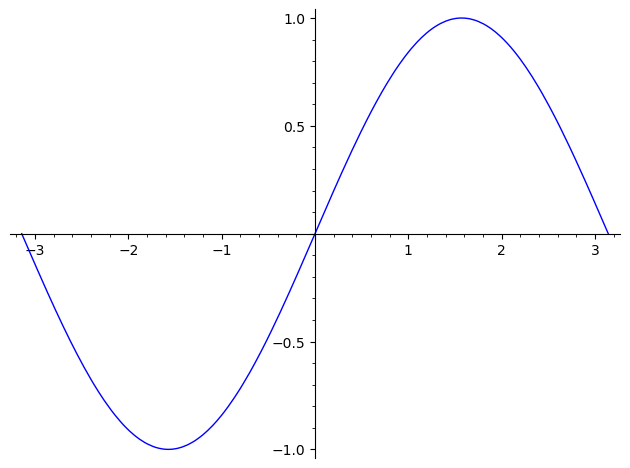

In [4]:
plot(sin, (-pi, pi))

In [5]:
pi20 = pi.n(digits=20)
print(pi20)
print(type(pi20))

3.1415926535897932385
<class 'sage.rings.real_mpfr.RealNumber'>


In [6]:
sin(pi20)

6.5640070857470010853e-22

In [7]:
from sage.misc.citation import get_systems
get_systems('pi.n(digits=20)')

['MPFR', 'ginac']

In [8]:
# Problem: compute the first ten rational approximations for pi,
# starting at 1 decimal place accurate to 10 decimal places.
L = [QQ(pi.n(digits=k)) for k in range(1,11)]
L

[19/6,
 113/36,
 333/106,
 355/113,
 355/113,
 93343/29712,
 98313/31294,
 104348/33215,
 312689/99532,
 833719/265381]

### Lec2

SageMath is a computer algebra system, capable of working with symbols.
For example, the transcendental constant $\pi$ is known to SageMath as ``pi``.
Applying the ``sin()`` function to $\pi$ shows the true value of $\sin(\pi)$.

In [ ]:
sin(pi)

0

The language of SageMath is based on Python.  Python is a dynamically typed language.  The type of each object determines the opererations that can be performed on the object.
We query the type of an object with ``type()``.

In [ ]:
type(pi)

<class 'sage.symbolic.expression.Expression'>

Note that SageMath is case sensitive ``pi`` $\not=$ ``Pi``.

**Numerical Approximations**

We can compute a numerical approximation for $\pi$, with the application of the method ``n()`` on the object ``pi``, which is of type symbolic expression.
In the argument of ``n()`` we can specify the number of decimal places with ``digits=``.

In [ ]:
Pi10 = pi.n(digits=10)
print(Pi10)
print(type(Pi10))

3.141592654
<class 'sage.rings.real_mpfr.RealNumber'>


The number we obtained is not a Python float, but of type ``RealNumber`` of the multiprecision  software GNU MPFR library.  Let us see by how much ``Pi10`` differs from $\pi$.

In [ ]:
delta = pi - Pi10
print(delta)
print(type(delta))

pi - 3.141592654
<class 'sage.symbolic.expression.Expression'>


The answer above is exact and correct, but it is not so helpful,
we were hoping to see a number to verify that our ``Pi10`` approximates $\pi$ really with 10 decimal places accuracy.  Let us compute a numerical approximation of ``delta``.

In [ ]:
print(delta.n(digits=10))
print(delta.n(digits=11))

0.0000000000
3.6379788071e-12


In [ ]:
Pi18q = QQ(Pi10)
print('the 10-digit accurate rational approximation for pi:', Pi18q)
print(type(Pi18q))

the 10-digit accurate rational approximation for pi: 833719/265381
<class 'sage.rings.rational.Rational'>


### Lec3

**1. Getting Started**

What is the accuracy of 22/7 as an approximation for $\pi$?

Well, we setup the formula for the relative error:

$$
    \left| \frac{22/7 - \pi}{\pi} \right|.
$$   

In [ ]:
error = abs((22/7 - pi)/pi)
show(error)

1/7*abs(7*pi - 22)/pi

Now we evaluate this error numerically, in a number system of sufficiently high precision.  For this problem, 5 decimal places will surely be sufficient.

In [ ]:
error.n(digits=5)

0.00040244

We see that the error is ``0.0004`` or $4 \times 10^{-4}$ which is ``4.0e-4`` in scientific notation, as verified below.

In [ ]:
'%.1e' % 0.0004

'4.0e-04'

**2. Getting Help**

In [ ]:
help(n)

Help on function numerical_approx in module sage.misc.functional:

numerical_approx(x, prec=None, digits=None, algorithm=None)
    Return a numerical approximation of ``self`` with ``prec`` bits
    (or decimal ``digits``) of precision.
    
    No guarantee is made about the accuracy of the result.
    
    .. NOTE::
    
        Lower case :func:`n` is an alias for :func:`numerical_approx`
        and may be used as a method.
    
    INPUT:
    
    - ``prec`` -- precision in bits
    
    - ``digits`` -- precision in decimal digits (only used if
      ``prec`` is not given)
    
    - ``algorithm`` -- which algorithm to use to compute this
      approximation (the accepted algorithms depend on the object)
    
    If neither ``prec`` nor ``digits`` is given, the default
    precision is 53 bits (roughly 16 digits).
    
    EXAMPLES::
    
        sage: numerical_approx(pi, 10)
        3.1
        sage: numerical_approx(pi, digits=10)
        3.141592654
        sage: numerical_app

The ``n()`` is an alias for the method ``numerical_approx``.  Observe the statement
``No guarantee is made about the accuracy of the result.``

If we would not know either ``n()`` nor ``numerical_approx`` and wanted to compute a numerical approximation, then we could search the entire SageMath documentation for the words ``numerical approximation``, as follows:

In [ ]:
search_doc("numerical_approximation")

The output is moved to the Jupyter Pager window.

The result is rather extensive.  The documentation of SageMath is organized into constructions, tutorials, preps (for undergraduates), and the reference manual.

**3. Arbitrary Precision Floating-Point Numbers**

One strength of computer algebra systems is that we are not limited to the machine precision and that we can work with arbitrary precision.

The ``RealField`` defines arithmetic with arbitrary precision, defined in bits.

To calculate how many bits are needed to have a desired precision in decimal places, we use the 2-logarithm of 10.

In [ ]:
p = ceil(8.0*log(10.0,2))
print("number of bits for 8 decimal places :", p)
R8 = RealField(prec=p)

number of bits for 8 decimal places : 27


Then we can use ``R8`` to get an 8-digit decimal approximation for $\pi$.

In [ ]:
R8(pi)

3.141593

Let us verify with what we have seen before.

In [ ]:
pi.n(digits=8)

3.1415927

### Lec4

**1. Rational Approximations with Prescribed Accuracy**

To make a rational approximation with a prescribed accuracy we do

1. evaluate the number as a floating-point number in the desired precision

2. converted the evaluated number into a rational number.

For example, compute a rational approximation of $\pi$ accurate to three decimal places.

In [ ]:
QQ(pi.n(digits=3))

333/106

**2. Continued Fractions**

A continued fraction is defined by a list of natural numbers.   Let look first at an example.

In [ ]:
c = continued_fraction(sqrt(2))
show(c)

[1; 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...]

We see that the continued fraction of $\sqrt{2}$ is very regular.

The ``convergents`` of the continued fraction define a sequence of rational approximations of increasing accuracy.

In [ ]:
c.convergents()

lazy list [1, 3/2, 7/5, ...]

The ``lazy`` aspect of the outcome refers to the delayed evaluation.

Let us force the computation of the convergents and ask for the first 8 convergents.

In [ ]:
cvg = c.convergents()
L = cvg[:8].list()
L

[1, 3/2, 7/5, 17/12, 41/29, 99/70, 239/169, 577/408]

To compute the relative errors of the approximations, we run a list comprehension.

In [ ]:
['%.1e' % (abs(sqrt(2) - x)/abs(sqrt(2))) for x in L]

['2.9e-01',
 '6.1e-02',
 '1.0e-02',
 '1.7e-03',
 '3.0e-04',
 '5.1e-05',
 '8.8e-06',
 '1.5e-06']

### Lec5

**1. Complex Numbers**

The set of all complex numbers is predefined as ``CC`` (or ``CDF`` for the complex double field).  Let us look at a random complex number.

In [ ]:
z = CC.random_element()
print(z)

0.850863261870165 - 0.914313861818274*I


In [ ]:
print('the real part :', z.real())
print('the imaginary part :', z.imag())

the real part : 0.850863261870165
the imaginary part : -0.914313861818274


The polar representation of a complex number is defined by the argument and the radius.

In [ ]:
r = abs(z)
print('the radius of', z, 'is', r)

the radius of 0.850863261870165 - 0.914313861818274*I is 1.24897483093671


In [ ]:
t = z.argument()
print('the argument of', z, 'is', t)

the argument of 0.850863261870165 - 0.914313861818274*I is -0.821328434738775


Given the argument and radius, we can compute the rectangular representation.

In [ ]:
rz = r*(cos(t) + sin(t)*I)
print('the rectangular format :', rz)
print('        the original z :', z)

the rectangular format : 0.850863261870165 - 0.914313861818275*I
        the original z : 0.850863261870165 - 0.914313861818274*I


To verify the formal definition of ``I`` we factor $x^2 + 1$ over the polynomial ring with complex coefficients.

In [ ]:
R.<x> = CC[]
print(R)

Univariate Polynomial Ring in x over Complex Field with 53 bits of precision


In [ ]:
p = x^2 + 1
factor(p)

(x - I) * (x + I)

We see that there are two square roots of $-1$.

In [ ]:
sqrt(-1, all=True)

[I, -I]

Therefore, is not strictly correct to refer to ``I`` as *the* square root of $-1$, because there are two square roots.  It is better to call ``I`` the positive square root of $-1$.

**2. Algebraic Numbers**

With a ``reset()`` we reset all names of variables.

In [ ]:
reset()

We extend the rational numbers with $\sqrt{2}$ in three steps:

1. We define the polynomial ring ``P`` for the polynomials in ``x`` with rational coefficients in ``QQ``.

2. The polynomial ``p`` is $x^2 - 2$ is the polynomial we want to factor over the field extension.

3. The extended number field is called ``Q1`` using ``sqrt2`` as the symbol for $\sqrt{-2}$.

In [ ]:
P.<x> = QQ[]
p = x^2 - 2
Q1.<sqrt2> = QQ.extension(p)
print(Q1)

Number Field in sqrt2 with defining polynomial x^2 - 2


Any polynomial in ``x`` will be seen as a polynomial with rational coefficients.  To define a polynomial over the extended field ``Q1``, we must use a new independent variable.  Therefore, we define ``P1`` as the ring of polynomials in ``y`` with coefficients in ``Q1``.

In [ ]:
P1.<y> = Q1[]
q = y^2 - 2
factor(q)

(y - sqrt2) * (y + sqrt2)

Now we see that over this new field, that $y^2 - 2$ factors.

To factor also $y^2 + 1$, we add the imaginary unit to ``Q1`` to obtain the extension ``Q2``.

In [ ]:
r = y^2 + 1
Q2.<imagunit> = Q1.extension(r)
print(Q2)

Number Field in imagunit with defining polynomial y^2 + 1 over its base field


In [ ]:
P2.<z> = Q2[]
s = z^2 + 2
factor(s)

(z + sqrt2*imagunit) * (z - sqrt2*imagunit)

**3. Finite Field Extensions**

In [ ]:
reset()

Over the binary number field, the polynomial $x^2 + 1$ factors.

In [ ]:
Z2 = Integers(2)
print(Z2)

Ring of integers modulo 2


In [ ]:
P.<x> = Z2[]
p = x^2 + 1
factor(p)

(x + 1)^2

If a polynomial factors, then we say it is *reducible*, otherwise it is *irreducible*.

In [ ]:
q = x^3 + x + 1
factor(q)

x^3 + x + 1

We see that $x^3 + x + 1$ does not factor over the binary numbers.  So we can extend ``Z2``.

In [ ]:
K.<c> = Z2.extension(q)
print(K)

Univariate Quotient Polynomial Ring in c over Ring of integers modulo 2 with modulus c^3 + c + 1


In a finite field we can list all elements.

In [ ]:
[x for x in K]

[0, 1, c, c + 1, c^2, c^2 + 1, c^2 + c, c^2 + c + 1]

The multiplication table is printed below.

In [ ]:
for x in K:
    print([x*y for y in K])

[0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, c, c + 1, c^2, c^2 + 1, c^2 + c, c^2 + c + 1]
[0, c, c^2, c^2 + c, c + 1, 1, c^2 + c + 1, c^2 + 1]
[0, c + 1, c^2 + c, c^2 + 1, c^2 + c + 1, c^2, 1, c]
[0, c^2, c + 1, c^2 + c + 1, c^2 + c, c, c^2 + 1, 1]
[0, c^2 + 1, 1, c^2, c, c^2 + c + 1, c + 1, c^2 + c]
[0, c^2 + c, c^2 + c + 1, 1, c^2 + 1, c + 1, c, c^2]
[0, c^2 + c + 1, c^2 + 1, c, 1, c^2 + c, c^2, c + 1]


Except for the first row and first column, there is exactly one ``1`` in every row and column, which shows that every element (except zero) has an inverse.

### Lec6

**1. An Example of a Symbolic Computation**

Let us declare four variables, using the letters a, b, c, and d.

In [ ]:
a,b,c,d = var('a,b,c,d')

We define $a + b \sqrt{2}$ and assign this expression to ``x``.

In [ ]:
x = a + b*sqrt(2)
x.show()

sqrt(2)*b + a

To ``y`` we assign the expression $c + d \sqrt{2}$.

In [ ]:
y = c + d*sqrt(2)
y.show()

sqrt(2)*d + c

Then we assign the product of ``x`` with ``y`` to ``z``.

In [ ]:
z = x*y
z.show()

(sqrt(2)*b + a)*(sqrt(2)*d + c)

By default, ``z = x*y`` is not expanded, we have to force the expansion by the application of the ``expand()`` method on ``z``.

In [ ]:
ez = z.expand()
ez.show()

sqrt(2)*b*c + sqrt(2)*a*d + a*c + 2*b*d

We see that the ``ez`` is not a simpler expression than the ``z``.  To collect the terms in $\sqrt{2}$, we select the coefficient of $\sqrt{2}$ in the expression ``ez``.

In [ ]:
f = ez.coefficient(sqrt(2))
f.show()

b*c + a*d

The ``f`` gives us the factor in the term with $\sqrt{2}$ in the expression.

In [ ]:
g = f*sqrt(2)
show(g)

sqrt(2)*(b*c + a*d)

In order to get the other term in the expression, we subtract the *expanded* ``g`` from ``ez`` to get the rest.

In [ ]:
h = g.expand()
rest = ez - h
rest.show()

a*c + 2*b*d

And now we can assemble the final result.

In [ ]:
final = rest + g
show(final)

a*c + 2*b*d + sqrt(2)*(b*c + a*d)

**2. the Symbolic Ring**

Consider the expression $\sqrt{x^2}$.

In [ ]:
x = var('x')
e = sqrt(x^2)
show(e)

sqrt(x^2)

Why does ``sqrt(x^2)`` not simplify to ``x``?  Well, recall that over the complex numbers, ``sqrt()`` is a double valued function.

We can force the choice of one of the answers, typically the positive one.

In [ ]:
e.canonicalize_radical()

x

We can declare letters as symbols.  Also numbers can be considered as symbols.

In [ ]:
sqrt4 = sqrt(SR(4), hold=True)
show(sqrt4)

sqrt(4)

In [ ]:
sqrt4.unhold()

2

In [ ]:
sin(pi)

0

In [ ]:
sinpi = sin(pi, hold=True)
show(sinpi)

sin(pi)

In [ ]:
sinpi.unhold()

0

**3. Names and References**

In [ ]:
reset()

In [ ]:
x, y = var('x, y')
x = y
x

y

We see that ``x`` evaluates to ``y``, because after ``x = y``, ``x`` refers to ``y``.

In [ ]:
y = 3
print('y equals', y)
print('x equals', x)

y equals 3
x equals y


We see that ``x`` still refers to ``y``, after the assignment of ``3`` to ``y``.

We can force the full evaluation with ``eval()`` which takes a string on argument.  The ``str(x)`` returns the string representation of the variable ``x``.

In [ ]:
eval(str(x))

3

What if we had started with ``y = 3``?  How do we prevent the evaluation of ``y`` when we assign ``y`` to ``x``?

To be clear, we still want the same dependencies between the variables as before:

$$
    x \longrightarrow y \longrightarrow 3
$$

Let us rebegin by resetting all variables.

In [ ]:
reset()

In [ ]:
x, y = var('x, y')
y = 3
print('y equals', y)

y equals 3


The key is to assign to ``x`` the *name* of ``y``.

In [ ]:
x = 'y'
print('x equals', x)

x equals y


In [ ]:
eval(str(x))

3

By placing quotes around ``y`` in the assignment to ``x`` we prevent ``y`` from evaluating to 3.

### Lec7

In this lecture 7 of MCS 320, we look at binary and hexadecimal formats of numbers, introduce the nearby rational approximations in the first section.  In the second section we illustrate how functions can be used to store data.

**1. Number Types**

The number types ``ZZ``, ``QQ``, ``RR``, and ``CC`` abbreviate respectively the integer, rational, real, and complex numbers.

We can use ``ZZ`` to compute the digits of the binary expansion of a number.

In [ ]:
ZZ(2022).digits(2)

[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]

Given the list of the bits in a number, we can convert back to its decimal representation.

In [ ]:
d = ZZ(2022).digits(2)
ZZ(d, base=2)

2022

For the real field ``RR``, we can ask the precision.

In [ ]:
RR.precision()

53

For a real number, we can ask the hexadecimal representation.

In [ ]:
r = RR.random_element()
print(r)

-0.414516219983697


In [ ]:
r.hex()

'-0x6.a1dbc287dd46p-4'

Let us consider the strange case of ``0.1``...

In [ ]:
nbr = RR(0.1)
nbr.hex()

'0x1.999999999999ap-4'

In [ ]:
R100 = RealField(prec=100)
nbr = R100(0.1)
nbr.hex()

'0x1.999999999999999999999999ap-4'

When going from 53 bits to 100 bits of precision, we see that the hexadecimal expansion of ``0.1`` does not stop.  This implies that ``0.1`` has no exact *binary* representation, unlike in decimal notation, where the expansion ``0.1`` matches $1/10$.

For any real number, we can ask for its nearest rational number, with an upper bound on the size of the denominator.

In [ ]:
x = RR.random_element()
print('x = ', x)
x.nearby_rational(max_denominator=100)

x =  -0.657062363581058


-23/35

In [ ]:
[x.nearby_rational(max_denominator=10^k) for k in range(1, 11)]

[-2/3,
 -23/35,
 -228/347,
 -5131/7809,
 -5131/7809,
 -471117/717005,
 -1175227/1788608,
 -64166368/97656435,
 -255490245/388837132,
 -6515588861/9916241170]

This is the third type of rational approximations we encounter.  The previous two types were

1. Rational approximations with prescribed precision.

2. The convergents of the continued fraction representation of the number.

In this third type we control the size of the rational number.

**2. Functions to Store Data**

In [ ]:
reset()

The list is a composite data structure.  The assignment ``L = [3, 2, 0]`` makes not only the list ``L`` but also the names ``L[0]``, ``L[1]``, and ``L[2]``.

We can use functions to store data as illustrated in the example below.

In [ ]:
def fun(item, data=[]):
    """
    Appends the item to data and prints data.
    """
    data.append(item)
    print(data)
    return id(data)

In [ ]:
fun(3)

[3]


123135382038160

In [ ]:
fun(2)

[3, 2]


123135382038160

In [ ]:
fun(0)

[3, 2, 0]


123135382038160

We see that the value of ``id(data)`` remains the same.

In [ ]:
idofdata = fun(4)

[3, 2, 0, 4]


With ``ctypes`` we can retrieve the value of an object, given its address.

In [ ]:
import ctypes
dataList = ctypes.cast(idofdata, ctypes.py_object).value
print(dataList)

[3, 2, 0, 4]


### Lec8

In lecture 8 of mcs 320, we consider evaluation and execution.

**1. Addition and Multiplication Tables**

For finite fields, we can tabulate the outcomes of the addition and multiplications of all elements in the field.  Let us make a field with four elements.  Because four is not a prime number, we cannot use the modulo four integers.

In [ ]:
Z2 = Integers(2)
P.<x> = Z2[]
q = x^2 + x + 1
factor(q)

x^2 + x + 1

We have a polynomial ``q`` in ``x`` of degree 2 with modulo two coefficients which is irreducible.

In [ ]:
Q.<a> = Z2.extension(q)
list(Q)

[0, 1, a, a + 1]

In [ ]:
print('the addition table:')
for x in Q:
    print([x+y for y in Q])

the addition table:
[0, 1, a, a + 1]
[1, 0, a + 1, a]
[a, a + 1, 0, 1]
[a + 1, a, 1, 0]


In [ ]:
print('the multiplication table:')
for x in Q:
    print([x*y for y in Q])

the multiplication table:
[0, 0, 0, 0]
[0, 1, a, a + 1]
[0, a, a + 1, 1]
[0, a + 1, 1, a]


In ``Q`` we have the following properties:

1. every number has an inverse with respect to the addition,

2. every nonzero number has a multiplicative inverse.

These properties make that ``Q`` is a field.

Observe the addition and multiplication tables of the ``GF(4)`` the Galois field of size 4.

In [ ]:
GF(4).addition_table()

+  a b c d
 +--------
a| a b c d
b| b a d c
c| c d a b
d| d c b a


In [ ]:
GF(4).multiplication_table()

*  a b c d
 +--------
a| a a a a
b| a b c d
c| a c d b
d| a d b c


**2. Binary Expression Trees**

A binary expression tree is a binary tree with leaves and nodes:

1. The leaves are either constants or operands.

2. The notes are the arithmetical operations.

Let us make an example: $x^3 + 4 x y^3$.

In [ ]:
from sage.ext.fast_callable import ExpressionTreeBuilder
etb = ExpressionTreeBuilder(vars=['x','y'])
x = etb.var('x')
y = etb.var('y')
p = x^3 + 4*x*y^3
print(p)

add(ipow(v_0, 3), mul(mul(4, v_0), ipow(v_1, 3)))


To draw the tree, we start with the six leaves.

In [ ]:
L1 = LabelledBinaryTree([None, None], label='v_0')
L2 = LabelledBinaryTree([None, None], label='3')
L3 = LabelledBinaryTree([None, None], label='4')
L4 = LabelledBinaryTree([None, None], label='v_1')

Two of the leaves appear twice, we do not make duplicate leaves.

In [ ]:
N12 = LabelledBinaryTree([L1, L2], label="*")
ascii_art(N12)

  _*_
 /   \
v_0   3

In [ ]:
N31 = LabelledBinaryTree([L3, L1], label='*')
ascii_art(N31)

  *
 / \
4   v_0

In [ ]:
N42 = LabelledBinaryTree([L4, L2], label='^')
ascii_art(N42)

  _^_
 /   \
v_1   3

In [ ]:
N3142 = LabelledBinaryTree([N31, N42], label="*")
ascii_art(N3142)

    ___*____
   /        \
  *         _^_
 / \       /   \
4   v_0   v_1   3

In [ ]:
final= LabelledBinaryTree([N12, N3142], label="+")
ascii_art(final)

     _____+_____
    /           \
  _*_         ___*____
 /   \       /        \
v_0   3     *         _^_
           / \       /   \
          4   v_0   v_1   3

To see a representation of the program listing to evaluate ``p``, we work as follows.

In [ ]:
f = fast_callable(p)
f.op_list()

[('load_arg', 0),
 ('ipow', 3),
 ('load_const', 4),
 ('load_arg', 0),
 'mul',
 ('load_arg', 1),
 ('ipow', 3),
 'mul',
 'add',
 'return']

### Lec9

In lecture 9 of mcs 320, we save data and load data from file.

**1. Saving Data as Plain Text**

In [ ]:
x = pi.n(digits=20)
print(x, 'has type', type(x))

3.1415926535897932385 has type <class 'sage.rings.real_mpfr.RealNumber'>


We will write the string representation of x to file.

In [ ]:
sx = str(x)
print(sx, 'has type', type(sx))

3.1415926535897932385 has type <class 'str'>


In [ ]:
file = open('mydata.txt', 'w')
file.write(sx)
file.close()

We can check what is in the listing of the current directory.

In [ ]:
import os
os.listdir('.')

['.ipynb_checkpoints',
 '.READ_ME.un~',
 'mcs320lec09.ipynb',
 'mcs320lec09s19.ipynb',
 'mydata.txt',
 'pickledresult.txt',
 'READ_ME',
 'READ_ME~',
 'sageobject.sobj']

In [ ]:
reset() # clear everything
x

x

In [ ]:
file = open('mydata.txt', 'r')
line = file.readline()
print(line, 'has type', type(line))

3.1415926535897932385 has type <class 'str'>


Now that we have the string, we have to convert this back into a proper SageMath object.
Python question: what is the opposite of ``str()``?

We could cast our number to a float.

In [ ]:
float(line)

3.141592653589793

In [ ]:
RR(line)

3.14159265358979

In [ ]:
ex = eval(line)
print(ex, 'has type', type(ex))

3.141592653589793 has type <class 'float'>


In SageMath, we have to call the preparser on the string, before evaluation.

In [ ]:
px = preparse(line)
print(px, 'has type', type(px))

RealNumber('3.1415926535897932385') has type <class 'str'>


In [ ]:
result = eval(px)
print(result, 'has type', type(result))

3.141592653589793239 has type <class 'sage.rings.real_mpfr.RealLiteral'>


**2. Saving Objects with save() and Retrieving with load()**

In [ ]:
print(result, 'has type', type(result))

3.141592653589793239 has type <class 'sage.rings.real_mpfr.RealLiteral'>


In [ ]:
result.save('sageobject')

In [ ]:
os.listdir('.')

['.ipynb_checkpoints',
 '.READ_ME.un~',
 'mcs320lec09.ipynb',
 'mcs320lec09s19.ipynb',
 'mydata.txt',
 'pickledresult.txt',
 'READ_ME',
 'READ_ME~',
 'sageobject.sobj']

In [ ]:
# reset('result')
# result
result = var('result')
result

result

In [ ]:
result = load('sageobject')
print(result, 'has type', type(result))

3.141592653589793239 has type <class 'sage.rings.real_mpfr.RealNumber'>


**3. Pickling Python Objects**

In [ ]:
import pickle
pr = pickle.dumps(result)
pr

b'\x80\x03csage.rings.real_mpfr\n__create__RealNumber_version0\nq\x00csage.rings.real_mpfr\n__create__RealField_version0\nq\x01KC\x89X\x04\x00\x00\x00RNDNq\x02\x87q\x03Rq\x04X\x12\x00\x00\x003.4gvml245kc4d80@0q\x05K \x87q\x06Rq\x07.'

The pickled object contains the type information.
We can write this to a file, as a string.

In [ ]:
file = open('pickledresult.txt', 'w')
file.write(str(pr))
file.close()

In [ ]:
os.listdir('.')

['.ipynb_checkpoints',
 '.READ_ME.un~',
 'mcs320lec09.ipynb',
 'mcs320lec09s19.ipynb',
 'mydata.txt',
 'pickledresult.txt',
 'READ_ME',
 'READ_ME~',
 'sageobject.sobj']

In [ ]:
result = var('result')
result

result

With ``del`` (a pure Python command), we deleted the object result.
Unlike the ``result = var('result')`` the name result does not exist.
Now we will retrieve the pickled data.

In [ ]:
file = open('pickledresult.txt', 'r')
lines = file.readlines()
print(lines, 'has type', type(lines))

["b'\\x80\\x03csage.rings.real_mpfr\\n__create__RealNumber_version0\\nq\\x00csage.rings.real_mpfr\\n__create__RealField_version0\\nq\\x01KC\\x89X\\x04\\x00\\x00\\x00RNDNq\\x02\\x87q\\x03Rq\\x04X\\x12\\x00\\x00\\x003.4gvml245kc4d80@0q\\x05K \\x87q\\x06Rq\\x07.'"] has type <class 'list'>


Question: how do we turn a list of strings into one big string?

In [ ]:
joinedpr = ''.join(lines)
joinedpr

"b'\\x80\\x03csage.rings.real_mpfr\\n__create__RealNumber_version0\\nq\\x00csage.rings.real_mpfr\\n__create__RealField_version0\\nq\\x01KC\\x89X\\x04\\x00\\x00\\x00RNDNq\\x02\\x87q\\x03Rq\\x04X\\x12\\x00\\x00\\x003.4gvml245kc4d80@0q\\x05K \\x87q\\x06Rq\\x07.'"

In [ ]:
bytejoinedpr = eval(joinedpr)
print(bytejoinedpr, 'has type', type(bytejoinedpr))

b'\x80\x03csage.rings.real_mpfr\n__create__RealNumber_version0\nq\x00csage.rings.real_mpfr\n__create__RealField_version0\nq\x01KC\x89X\x04\x00\x00\x00RNDNq\x02\x87q\x03Rq\x04X\x12\x00\x00\x003.4gvml245kc4d80@0q\x05K \x87q\x06Rq\x07.' has type <class 'bytes'>


In [ ]:
r = pickle.loads(bytejoinedpr)
print(r, 'has type', type(r))

3.141592653589793239 has type <class 'sage.rings.real_mpfr.RealNumber'>


### Lec10

In lecture 10 of mcs 320, we time Python functions and make them more efficient by vectorization and by Cython.

**1. Timing Python functions**

This lecture follows Chapter 3 of Sage for Power Users by William Stein.
We consider the computation of a floating-point approximation
of a sum of square roots.  Such sums occur in numerical integration.
One way to approximate $\pi/4$ is as below.

In [ ]:
def python_sum_symbolic(n):
    return float( sum(sqrt(1-(k/n)^2) for k in range(1, n+1)) )/n
4*python_sum_symbolic(1000)

3.1395554669110264

To benchmark the function, we can use timeit.
The command ``timeit`` in Python is good to measure
the execution time of small code snippets.

In [ ]:
timeit('python_sum_symbolic(1000)')

5 loops, best of 3: 58.8 ms per loop

For longer execution times, we better use ``cputime()``.

In [ ]:
t1 = cputime() # cpu time since Sage started
python_sum_symbolic(10^4)
ct1 = cputime(t1) # cpu time since t1
print('time for python_sum_symbolic :', ct1)

time for python_sum_symbolic : 1.859


**2. Use numerical functions**

The first reason that the function is so slow is because we use
the symbolic sqrt function. 
We will use the sqrt function of the math module in Python.
The explicit conversion to float is no longer needed because
the this sqrt returns a floating-point number.

In [ ]:
def python_sum(n):
    from math import sqrt
    return sum( sqrt(1-(k/n)^2) for k in range(1, n+1) )/n
4*python_sum(1000)

3.139555466911023

In [ ]:
t2 = cputime()
python_sum(10^4)
ct2 = cputime(t2)
print('time for python_sum :', ct2)

time for python_sum : 0.016000000000000014


In [ ]:
timeit('python_sum(10^4)')

25 loops, best of 3: 21.3 ms per loop

In [ ]:
print('speedup :', ct1/ct2)

speedup : 116.1874999999999


**3. Vectorize**

Instead of the sum we could apply vectorization with numpy.

In [ ]:
def numpy_sum(n): 
    from numpy import sqrt, sum, arange
    x = arange(n)/float(n)
    return sum(sqrt(1-x**2))/n
4*numpy_sum(1000)

3.1435554669110277

In [ ]:
timeit('numpy_sum(10^4)')

625 loops, best of 3: 101 μs per loop

In [ ]:
# To compare against pure Python, we sum a million times.
t3 = cputime()
python_sum(10^6)
ct3 = cputime(t3)
print('time for python_sum :', ct3)
t4 = cputime()
numpy_sum(10^6)
ct4 = cputime(t4)
print('time for numpy_sum :', ct4)

time for python_sum : 2.1249999999999982
time for numpy_sum : 0.031000000000000583


In [ ]:
print('speedup :', ct3/ct4)

speedup : 68.54838709677284


**4. Cythonize**

In [ ]:
%%cython
def cython_sum(n):
    from math import sqrt
    return sum( sqrt(1-(k/n)**2) for k in range(1, n+1) )/n

The advantage of Cython is that the code is almost identical to Python.
The two links returned when evaluating a cell with Cython code are the generated C code
and an html file with the annotated version of the Cython program.
In this particular example we had to replace the ^ of the python_sum with **.

In [ ]:
print(4*cython_sum(1000))

3.139555466911023


In [ ]:
timeit('cython_sum(10^4)')

5 loops, best of 3: 32.8 ms per loop

In [ ]:
t5 = cputime()
cython_sum(10^6)
ct5 = cputime(t5)
print('time for the cython_sum :', ct5)

time for the cython_sum : 3.2029999999999976


In [ ]:
%%cython
cdef extern from "math.h":
    double sqrt(double)

def cython_sum_typed(long n):
    cdef long k
    return sum( sqrt(1-(k/float(n))**2) for k in range(1, n+1) )/n

In [ ]:
print(4*cython_sum_typed(1000))

3.139555466911023


In [ ]:
timeit('cython_sum_typed(10^4)')

625 loops, best of 3: 1.11 ms per loop

In [ ]:
t6 = cputime()
cython_sum_typed(10^6)
ct6 = cputime(t6)
print('time for cython_sum_typed :', ct6)

time for cython_sum_typed : 0.10999999999999943


In [ ]:
print('speedup :', ct5/ct6)

speedup : 29.11818181818195


### Lec11

In lecture 11 of mcs 320, we consider univariate and multivariate polynomials.

**1. Polynomials and Expressions**

Consider $p = x^3 - x^2 + 2 x - 2$.

In [ ]:
p = x^3 - x^2 + 2*x - 2
print(p, 'has type', type(p))

x^3 - x^2 + 2*x - 2 has type <class 'sage.symbolic.expression.Expression'>


We see that ``p`` is a symbolic expression.  If we want to define $x^3 - x^2 + 2 x - 2$ as a polynomial with rational coefficients, then we can cast ``p`` as a polynomial in ``QQ[x]``.

In [ ]:
q = QQ[x](p)
print(q, 'has type', type(q))

x^3 - x^2 + 2*x - 2 has type <class 'sage.rings.polynomial.polynomial_rational_flint.Polynomial_rational_flint'>


The ``QQ[x](p)`` is a *type cast*, it returns ``p`` as a polynomial in ``QQ[x]``, as a polynomial in ``x`` with rational coefficients.

In [ ]:
q.degree()

3

In [ ]:
q.list()

[-2, 2, -1, 1]

In [ ]:
q.coefficients(sparse=False)

[-2, 2, -1, 1]

Observe that the coefficients are starting with the constant, not the coefficient of the highest degree term.

**2. Numeric, Exact, and Symbolic Factorizations**

The numeric factorization of a polynomial corresponds to computing the complex roots.

In [ ]:
q.roots(CC)

[(1.00000000000000, 1), (-1.41421356237310*I, 1), (1.41421356237310*I, 1)]

To see the numeric factorization, we must cast ``q`` into ``CC[x]``, the ring of polynomials in ``x`` with coefficients in ``CC``.

In [ ]:
factor(CC[x](q))

(x - 1.00000000000000) * (x - 1.41421356237310*I) * (x + 1.41421356237310*I)

For the exact factorization, we started with a polynomial with rational coefficients, so we just do ``factor`` on ``q``.

In [ ]:
factor(q)

(x - 1) * (x^2 + 2)

In [ ]:
q.is_irreducible()

False

Let us make field extensions so the polynomial factors.

In [ ]:
Lfq = list(factor(q))
Lfq

[(x - 1, 1), (x^2 + 2, 1)]

We see that the second factor is a quadratic polynomial, with multiplicity one.

In [ ]:
qf2 = Lfq[1][0]
qf2

x^2 + 2

In [ ]:
Q1.<b> = QQ.extension(qf2)
P1.<y> = Q1[]
q1 = P1(q)
print(q1, 'has type', type(q1))

y^3 - y^2 + 2*y - 2 has type <class 'sage.rings.polynomial.polynomial_ring.PolynomialRing_field_with_category.element_class'>


In [ ]:
factor(q1)

(y - 1) * (y - b) * (y + b)

We see the symbolic factorization of the polynomial ``q``, with roots ``1``, ``b`` and ``- b``.

**3. Polynomials in Several Variables**

Let us look at polynomials in ``x``, ``y``, and ``z`` with integer coefficients.

In [ ]:
P.<x,y,z> = ZZ[]
print(P)

Multivariate Polynomial Ring in x, y, z over Integer Ring


In [ ]:
p = P.random_element(degree=4, terms=15)
print(p, 'has type', type(p))

-x^3*y - 29*x^2*y^2 - 2*x^3*z + 5*x*y^2*z + x*y*z^2 - 4*y*z^3 - z^4 - x^3 - y^2*z - x*z^2 + z^3 + 2*x^2 + 5*z has type <class 'sage.rings.polynomial.multi_polynomial_libsingular.MPolynomial_libsingular'>


We can view ``p`` as a polynomial in ``x`` with coefficients as polynomials in ``y`` and ``z``.

In [ ]:
ZZ[y,z][x](p)

(-y - 2*z - 1)*x^3 + (-29*y^2 + 2)*x^2 + (5*y^2*z + y*z^2 - z^2)*x - 4*y*z^3 - z^4 - y^2*z + z^3 + 5*z

We could take the recursion farther.

In [ ]:
ZZ[z][y][x](p)

(-y - 2*z - 1)*x^3 + (-29*y^2 + 2)*x^2 + (5*z*y^2 + z^2*y - z^2)*x - z*y^2 - 4*z^3*y - z^4 + z^3 + 5*z

To order the terms in the polynomial in pure lexicographical order, we define another ring ``Plex``.

In [ ]:
Plex.<x,y,z> = PolynomialRing(ZZ, order='lex')
Plex(p)

-x^3*y - 2*x^3*z - x^3 - 29*x^2*y^2 + 2*x^2 + 5*x*y^2*z + x*y*z^2 - x*z^2 - y^2*z - 4*y*z^3 - z^4 + z^3 + 5*z

The default order is degree lexicographic, which is defined explicitly below.

In [ ]:
Pdeglex.<x,y,z> = PolynomialRing(ZZ, order='deglex')
Pdeglex(p)

-x^3*y - 2*x^3*z - 29*x^2*y^2 + 5*x*y^2*z + x*y*z^2 - 4*y*z^3 - z^4 - x^3 - x*z^2 - y^2*z + z^3 + 2*x^2 + 5*z

### Lec12

In lecture 12 of mcs 320 we look at rational expressions and expression swell.

**1. Rational Expressions and Rational Polynomials**

We start by explaining the difference between arithmetical expressions and rational polynomials.

In [ ]:
x = var('x')
e = (x^3 - 1)/(x - 1)
print(e, 'has type', type(e))

(x^3 - 1)/(x - 1) has type <class 'sage.symbolic.expression.Expression'>


In [ ]:
x = polygen(QQ)
r = (x^3 - 1)/(x - 1)
print(r, 'has type', type(r))

x^2 + x + 1 has type <class 'sage.rings.fraction_field_element.FractionFieldElement_1poly_field'>


Observe first the difference between the types of ``e`` and ``r``, caused by the type declarations of ``x``.  When we declare ``x`` a variable, then we obtain an expression.  The statement ``x = polygen(QQ)`` has the same effect as ``P.<x> = QQ[]`` in that every polynomial in ``x`` will be viewed as a polynomial in ``x`` with rational coefficients.

Observe next the consequences of the declarations.  The symbolic expression remains as we typed it in.  With the polynomials, the common factor ``x-1`` is removed from numerator and denominator.

Such simplification is not always desirable as it leads to expression swell.

In [ ]:
p = (x^1000 - 1)/(x - 1)
p

x^999 + x^998 + x^997 + x^996 + x^995 + x^994 + x^993 + x^992 + x^991 + x^990 + x^989 + x^988 + x^987 + x^986 + x^985 + x^984 + x^983 + x^982 + x^981 + x^980 + x^979 + x^978 + x^977 + x^976 + x^975 + x^974 + x^973 + x^972 + x^971 + x^970 + x^969 + x^968 + x^967 + x^966 + x^965 + x^964 + x^963 + x^962 + x^961 + x^960 + x^959 + x^958 + x^957 + x^956 + x^955 + x^954 + x^953 + x^952 + x^951 + x^950 + x^949 + x^948 + x^947 + x^946 + x^945 + x^944 + x^943 + x^942 + x^941 + x^940 + x^939 + x^938 + x^937 + x^936 + x^935 + x^934 + x^933 + x^932 + x^931 + x^930 + x^929 + x^928 + x^927 + x^926 + x^925 + x^924 + x^923 + x^922 + x^921 + x^920 + x^919 + x^918 + x^917 + x^916 + x^915 + x^914 + x^913 + x^912 + x^911 + x^910 + x^909 + x^908 + x^907 + x^906 + x^905 + x^904 + x^903 + x^902 + x^901 + x^900 + x^899 + x^898 + x^897 + x^896 + x^895 + x^894 + x^893 + x^892 + x^891 + x^890 + x^889 + x^888 + x^887 + x^886 + x^885 + x^884 + x^883 + x^882 + x^881 + x^880 + x^879 + x^878 + x^877 + x^876 + x^875 + 

The original expression was much simpler to write.  In order to count the number of coefficients.  We must convert the type of ``p`` into a polynomial, so we can ask for its coefficient list.

In [ ]:
type(p)

<class 'sage.rings.fraction_field_element.FractionFieldElement_1poly_field'>

In [ ]:
q = QQ[x](p)
print(type(q))

<class 'sage.rings.polynomial.polynomial_rational_flint.Polynomial_rational_flint'>


In [ ]:
len(q.coefficients())

1000

**2. Normal Forms of Rational Polynomials**

For a quotient of two polynomials in one variable, we have four normal forms:

1. Both numerator and denominator are expanded.

2. Numerator is factored, denominator is expanded.

3. Numerator is expanded, denominator is factored.

4. Both numerator and denominator are factored.

In [ ]:
reset()

In [ ]:
r = (x^2-1)/((x+1)*(x+2))
r

(x^2 - 1)/((x + 2)*(x + 1))

Let us examine the four different normalizations.

In [ ]:
r.numerator(normalize=False)

(x^2 - 1)

In [ ]:
r.numerator(normalize=True)

x - 1

In [ ]:
r.denominator(normalize=False)

(x + 2)*(x + 1)

In [ ]:
r.denominator(normalize=True)

x + 2

**3. Horner Form and Partial Fraction Decomposition**

The Horner form for a polynomial in one variable provides an algorithm to evaluate the polynomial efficiently.

In [ ]:
p = QQ[x].random_element(degree=8)
p

x^8 - 6*x^7 - 2/3*x^6 - x^5 + 4*x^4 - 1/4*x^3 - 3/2*x^2 - 11/2*x + 2

To compute the Horner form of a polynomial, we must convert to the Symbolic Ring ``SR``.

In [ ]:
SR(p).horner(x)

1/12*(((4*(((3*(x - 6)*x - 2)*x - 3)*x + 12)*x - 3)*x - 18)*x - 66)*x + 2

The partial fraction decomposition is defined for rational polynomials.

In [ ]:
numerator = QQ[x].random_element(degree=4)
denominator = ((x^2 - 1)*(x^2 - 4)).expand()
r = numerator/denominator
r

1/14*(7*x^4 - 4*x^3 - 7*x - 14)/(x^4 - 5*x^2 + 4)

If we use the ``partial_fraction()`` method, then we must also convert to the Symbolic Ring ``SR``.

In [ ]:
rpd = SR(r).partial_fraction()
show(rpd)

-6/7/(x + 2) + 1/21/(x + 1) + 3/14/(x - 1) + 13/42/(x - 2) + 1/2

A random denominator will most likely not factor over the rational numbers,
let us compute the numerical partial fraction decomposition, that is: over the complex numbers.

In [ ]:
cr = CC[x](r.numerator())/(CC[x](r.denominator()))
print(cr, 'has type', type(cr))

(7.00000000000000*x^4 - 4.00000000000000*x^3 - 7.00000000000000*x - 14.0000000000000)/(14.0000000000000*x^4 - 70.0000000000000*x^2 + 56.0000000000000) has type <class 'sage.rings.fraction_field_element.FractionFieldElement_1poly_field'>


In [ ]:
crd = cr.partial_fraction_decomposition()
show(crd)

(0.500000000000000,
 [0.309523809523810/(x - 2.00000000000000),
  0.214285714285714/(x - 1.00000000000000),
  0.0476190476190476/(x + 1.00000000000000),
  (-0.857142857142857)/(x + 2.00000000000000)])

In [ ]:
L = crd[1]
sum(L)

(-0.285714285714286*x^3 + 2.50000000000000*x^2 - 0.500000000000000*x - 3.00000000000000)/(x^4 - 5.00000000000000*x^2 + 4.00000000000000)

In [ ]:
reconstructed = crd[0]*sum(L)
show(reconstructed)

(-0.142857142857143*x^3 + 1.25000000000000*x^2 - 0.250000000000000*x - 1.50000000000000)/(x^4 - 5.00000000000000*x^2 + 4.00000000000000)

In [ ]:
show(cr)

(7.00000000000000*x^4 - 4.00000000000000*x^3 - 7.00000000000000*x - 14.0000000000000)/(14.0000000000000*x^4 - 70.0000000000000*x^2 + 56.0000000000000)

We see that both ``reconstructed`` and ``cr`` are the same mathematically.

### Lec13

In lecture 13 of MCS 320, we look at expression trees, symbolic and numeric evaluation.

**1. Expression Trees**

We will make a random polynomial with 3 terms, of degree 13, with rational coefficients, in the variables x, y, and z.  To see always the same polynomial, we fix the seed of the random number generator.

In [ ]:
P.<x,y,z> = QQ[]
set_random_seed(2022)
p = P.random_element(terms=3, degree=13)
show(p)

2/9*x^5*y^6*z^2 - 1/2*x^3*y^6*z - 35/2*x^5*z^4

To get the operator/operands view to work on ``p``, we must convert to a symbolic expression.  While the shortest way is to cast ``p`` into the Symbolic Ring ``SR``, the alternative is to apply *symbolic evaluation*.  We redeclare x, y, and z as variables and evaluate ``p`` symbolically in those new variables to obtain the expression ``q``.

In [ ]:
x, y, z = var('x, y, z')
q = p(x=x, y=y, z=z)
print(q, 'has type', type(q))

2/9*x^5*y^6*z^2 - 1/2*x^3*y^6*z - 35/2*x^5*z^4 has type <class 'sage.symbolic.expression.Expression'>


In the symbolic evaluation ``p(x=x, y=y, z=z)`` at the left of each ``=`` are the symbols used to define ``p``.  At the right of each ``=`` are the newly declared symbols.  Observe that ``q`` is now a symbolic expression.

In [ ]:
q.operator()

<function add_vararg at 0x7fdf6f6c6170>

In [ ]:
q.operands()

[2/9*x^5*y^6*z^2, -1/2*x^3*y^6*z, -35/2*x^5*z^4]

The operator of ``q`` is an addition which takes as operands a list.

In [ ]:
q0 = q.operands()[0]
q0.operator()

<function mul_vararg at 0x7fdf6f6c6200>

In [ ]:
q0.operands()

[x^5, y^6, z^2, 2/9]

The first term of ``q`` has the multiplication operator with a list of four operands. 

In [ ]:
q00 = q0.operands()[0]
q00.operator()

<built-in function pow>

In [ ]:
q00.operands()

[x, 5]

The power of the first operand in the the first term of ``q`` is a binary operator, with two operands.

To draw the expression tree, we use a ``LabelledOrderedTree``.  The labels for the children are the operands in the expression.

On the WSL (Window Subsystem for Linux) running Ubuntu 22.04.2 LTS, the following statement is needed for the `ascii_art` to display properly.

In [ ]:
sage.typeset.ascii_art.AsciiArt._terminal_width = lambda x: 80

In [ ]:
oplabels = [str(op) for op in q.operands()]
operands = [LabelledOrderedTree([], label=op) for op in oplabels]
exptree = LabelledOrderedTree(operands, label='+')
ascii_art(exptree)

  ______________+________________
 /               /              /            
2/9*x^5*y^6*z^2 -1/2*x^3*y^6*z -35/2*x^5*z^4

We now do the same to the leaves.

In [ ]:
oplabels = [op.operands() for op in q.operands()]
oplabels

[[x^5, y^6, z^2, 2/9], [x^3, y^6, z, -1/2], [x^5, z^4, -35/2]]

in the definition of ``oplabels`` we applied the ``operands()`` to every operand of ``q``.

In [ ]:
term0leaves = [LabelledOrderedTree([], label=op) for op in oplabels[0]]
term0tree = LabelledOrderedTree(term0leaves, label='*')
ascii_art(term0tree)

  _____*______
 /   /   /   /  
x^5 y^6 z^2 2/9

We do the same operation for the other two terms.

In [ ]:
term1leaves = [LabelledOrderedTree([], label=op) for op in oplabels[1]]
term1tree = LabelledOrderedTree(term1leaves, label='*')
ascii_art(term1tree)

  ____*_____
 /   /   / /   
x^3 y^6 z -1/2

In [ ]:
term2leaves = [LabelledOrderedTree([], label=op) for op in oplabels[2]]
term2tree = LabelledOrderedTree(term2leaves, label='*')
ascii_art(term2tree)

  ___*____
 /   /   /    
x^5 z^4 -35/2

We still have to replace the powers of the variables by trees.

In [ ]:
leafx = LabelledOrderedTree([], label='x')
leaf5 = LabelledOrderedTree([], label='5')
nodex5 = LabelledOrderedTree([leafx, leaf5], label='^')
ascii_art(nodex5)

  ^_
 / /
x 5

In [ ]:
leafz = LabelledOrderedTree([], label='z')
leaf4 = LabelledOrderedTree([], label='4')
nodez4 = LabelledOrderedTree([leafz, leaf4], label='^')
ascii_art(nodez4)

  ^_
 / /
z 4

In [ ]:
newterm2tree = LabelledOrderedTree([nodex5, nodez4, term2leaves[2]], label='*')
ascii_art(newterm2tree)

    ___*____
   /    /  /    
  ^_   ^_ -35/2
 / /  / /
x 5  z 4 

We can defined the other powers similarly.

In [ ]:
leafy = LabelledOrderedTree([], label='y')
leaf2 = LabelledOrderedTree([], label='2')
leaf3 = LabelledOrderedTree([], label='3')
leaf4 = LabelledOrderedTree([], label='4')
leaf6 = LabelledOrderedTree([], label='6')
nodex3 = LabelledOrderedTree([leafx, leaf3], label='^')
ascii_art(nodex3)
nodey6 = LabelledOrderedTree([leafy, leaf6], label='^')
ascii_art(nodey6)
nodez2 = LabelledOrderedTree([leafz, leaf2], label='^')
ascii_art(nodez2)

  ^_
 / /
z 2

In [ ]:
ascii_art(term0tree)

  _____*______
 /   /   /   /  
x^5 y^6 z^2 2/9

In [ ]:
newterm0tree = LabelledOrderedTree([nodex5, nodey6, nodez2, term0leaves[3]], label='*')
ascii_art(newterm0tree)

    _____*_______
   /    /    /  /  
  ^_   ^_   ^_ 2/9
 / /  / /  / /
x 5  y 6  z 2 

In [ ]:
ascii_art(term1tree)

  ____*_____
 /   /   / /   
x^3 y^6 z -1/2

In [ ]:
newterm1tree = LabelledOrderedTree([nodex3, nodey6, leafz, term1leaves[3]], label='*')
ascii_art(newterm1tree)

    ____*_____
   /    /  / /   
  ^_   ^_ z -1/2
 / /  / /  
x 3  y 6   

Now we can assemble the entire tree.

In [ ]:
nodes = [newterm0tree, newterm1tree, newterm2tree]
exptree = LabelledOrderedTree(nodes, label='+')
ascii_art(exptree)

           _________________+__________________
          /                  /                /        
    _____*_______       ____*_____        ___*____
   /    /    /  /      /    /  / /       /    /  /    
  ^_   ^_   ^_ 2/9    ^_   ^_ z -1/2    ^_   ^_ -35/2
 / /  / /  / /       / /  / /          / /  / /
x 5  y 6  z 2       x 3  y 6          x 5  z 4 

**2. Fast Callable Objects**

We encountered fast callable objects before, with the binary expression trees.  In this section we demonstrate why they are *fast* compared to general expressions.

In [ ]:
q

2/9*x^5*y^6*z^2 - 1/2*x^3*y^6*z - 35/2*x^5*z^4

In [ ]:
q(x=1.0, y=2.0, z=3.0)

-1385.50000000000

In [ ]:
f = fast_callable(q, vars=['x','y','z'])

In [ ]:
f(1.0, 2.0, 3.0)

-1385.50000000000

In [ ]:
timeit('q(x=1.0, y=2.0, z=3.0)')

625 loops, best of 3: 48.7 μs per loop

In [ ]:
timeit('f(1.0, 2.0, 3.0)')

625 loops, best of 3: 5.86 μs per loop

Compare the difference in times.  Even for such a small expression as ``q``, the fast callable is much faster.  Observe however, that fast callables are defined for numerical, not for symbolic evaluation.

In [ ]:
f.op_list()

[('load_arg', 0),
 ('ipow', 5),
 ('load_arg', 1),
 ('ipow', 6),
 'mul',
 ('load_arg', 2),
 ('ipow', 2),
 'mul',
 ('load_const', 2/9),
 'mul',
 ('load_arg', 0),
 ('ipow', 3),
 ('load_arg', 1),
 ('ipow', 6),
 'mul',
 ('load_arg', 2),
 'mul',
 ('load_const', -1/2),
 'mul',
 'add',
 ('load_arg', 0),
 ('ipow', 5),
 ('load_arg', 2),
 ('ipow', 4),
 'mul',
 ('load_const', -35/2),
 'mul',
 'add',
 'return']

In [ ]:
from sage.ext.fast_callable import ExpressionTreeBuilder
etb = ExpressionTreeBuilder(vars=['x','y','z'])
x = etb.var('x')
y = etb.var('y')
z = etb.var('z')
p(x=x, y=y, z=z)

add(add(add(0, mul(2/9, mul(mul(ipow(v_0, 5), ipow(v_1, 6)), ipow(v_2, 2)))), mul(-1/2, mul(mul(ipow(v_0, 3), ipow(v_1, 6)), ipow(v_2, 1)))), mul(-35/2, mul(ipow(v_0, 5), ipow(v_2, 4))))

Observe the binary structure.

### Lec14

In lecture 14 of mcs 320, we cover substitution, expansion, and factorization.

**1. Substitution**

Suppose we want to rewrite

$$
    (x+y)^2 + \frac{1}{(x+y)^2}
$$

into

$$
    \frac{(x+y)^4 + 1}{(x+y)^2}.
$$ 

The problem is that we do not want to expand the numerator.

In [ ]:
x, y = var('x, y')
p = (x+y)^2 + 1/(x+y)^2
show(p)

(x + y)^2 + 1/(x + y)^2

The method ``factor()`` puts the expression ``p`` on the common denominator:

In [ ]:
p.factor()

(x^4 + 4*x^3*y + 6*x^2*y^2 + 4*x*y^3 + y^4 + 1)/(x + y)^2

But we see that the numerator is expanded.

To prevent ``(x+y)^4`` from expanding in the numerator, we substitute ``x+y`` by ``z``.

In [ ]:
z = var('z')
q = p.subs({x+y: z})
q

z^2 + 1/z^2

Observe the syntax of the ``subs()`` method.  The argument is the dictionary ``{x+y: z}`` has as key the expression we want to replace by ``z``, the corresponding value of the key.

In [ ]:
r = q.factor()
r

(z^4 + 1)/z^2

The ``z`` shielded the expansion of ``(x+y)^4``.

In [ ]:
f = r(z=x+y)
f

((x + y)^4 + 1)/(x + y)^2

The substition of a variable in an expression can be executed faster by *symbolic evaluation*.

**2. Sequential and Simultaneous Substitution**

In sequential substitution, we replace variables one after the other.  In a simultaneous substitution, all variables are replaced all at once.

In [ ]:
reset()
a, b, c = var('a, b, c')
p = a + 2*b + 3*c
p

a + 2*b + 3*c

Suppose we want to replace ``a`` by ``b``, ``b`` by ``c``, and ``c`` by ``a``.

In [ ]:
p.subs({a: b, b: c, c: a})

3*a + b + 2*c

In [ ]:
p(a=b,b=c,c=a)

3*a + b + 2*c

The above substitutions are simultaneous.

The substitutions below are sequential.

In [ ]:
p.subs({a: b}).subs({b: c}).subs({c: a})

6*a

In [ ]:
p(a=b)(b=c)(c=a)

6*a

**3. Collecting Terms**

Consider writing

$$
   (a + b + c) \star (x^2 + x + 1)
$$

into

$$
   (a + b + c) x^2 + (a + b + c) x + (a + b + c).
$$

In [ ]:
p = (a+b+c)*(x^2 + x + 1)
p

(x^2 + x + 1)*(a + b + c)

Applying ``expand()`` on ``p`` leads to expression swell.  To avoid the expression swell we can substitution ``(a+b+c)`` by ``z`` as we did before.  This is a good exercise.

An alternative is to work with a polynomial in ``x`` and coefficients in ``a``, ``b``, and ``c``.

In [ ]:
ZZ[a,b,c][x](p)

(a + b + c)*x^2 + (a + b + c)*x + a + b + c

### Lec15

Lecture 15 of mcs 320 is on normalization.

**1. Normalization of Expressions**

When are two expressions the same?  Consider the following example.

In [ ]:
x, y = var('x, y')
e1 = x*(x + y)
e2 = x^2 + x*y
print(e1)
print(e2)

(x + y)*x
x^2 + x*y


Although ``e1`` and ``e2`` look different, we know that they are mathematically equivalent.

In [ ]:
print('e1.operands() :', e1.operands())
print('e2.operands() :', e2.operands())
print('e1.operator() :', e1.operator())
print('e2.operator() :', e2.operator())

e1.operands() : [x + y, x]
e2.operands() : [x^2, x*y]
e1.operator() : <function mul_vararg at 0x6ffdb32a3d40>
e2.operator() : <function add_vararg at 0x6ffdb32a3170>


Viewed as expressions, ``e1`` and ``e2`` are entirely different, and yet mathematically equivalent.  Let us look at their difference.

In [ ]:
d = e1 - e2
d

(x + y)*x - x^2 - x*y

In [ ]:
d.expand()

0

In fully expanded form, the difference collapses to zero and therefore we computed that ``e1`` and ``e2`` are the same.

**2. Rewriting Multivariate Polynomials**

We can cast the expressions ``e1`` and ``e2`` into the polynomial ring in the variables ``x`` and ``y`` and with integer coefficients.  The monomial order imposed by the cast will normalize the expressions.

In [ ]:
p1 = ZZ[x,y](e1)
print(p1, 'has type', type(p1))

x^2 + x*y has type <class 'sage.rings.polynomial.multi_polynomial_libsingular.MPolynomial_libsingular'>


In [ ]:
p2 = ZZ[x,y](e2)
print(p2, 'has type', type(p2))

x^2 + x*y has type <class 'sage.rings.polynomial.multi_polynomial_libsingular.MPolynomial_libsingular'>


The ``p1`` and ``p2`` obtained by respectively casting ``e1`` and ``e2`` into ``ZZ[x,y]`` are identical.

In [ ]:
p1 - p2

0

There are many monomial orders.  We distinguish between the pure lexicographic and the degree lexicographic as the two main ones.  The first choice we make is the order of the variables, which by default is alphabetically.

Let us look at a random polynomial with integer coefficients, in ``x``, ``y`` and ``z``, with the monomials ordered lexicographically.

In [ ]:
Plex.<x,y,z> = PolynomialRing(ZZ, order='lex')
p = Plex.random_element(degree=8, terms=20)
show(p)

-x^5*z - 3*x^4*y*z^2 + x^4*z + x^3*z^4 - x^2*y*z^3 - 3*x*y*z^5 + 2*x*y*z^3 - y^5*z - y^5 - y^4*z^4 - y^3*z^4 + 2*y^3*z + y^2 - 2*y*z^7 - 3*y*z^4

Let us now reorder the monomials, using as variable order z > y > x (reverse lexicographic) and order by degrees (which is the default).

In [ ]:
Pdeg.<z,y,x> = PolynomialRing(ZZ)
q = Pdeg(p)
show(q)

-2*z^7*y - z^4*y^4 - z^4*y^3 - 3*z^5*y*x + z^4*x^3 - 3*z^2*y*x^4 - z*y^5 - z^3*y*x^2 - z*x^5 - 3*z^4*y - y^5 + 2*z^3*y*x + z*x^4 + 2*z*y^3 + y^2

Observe the different positions of the monomials.

**3. A Numerical Test on Equality**

Because the number of monomials may grow exponentially with increasing number of variables, rewriting a polynomial is often two expensive.  Consider again our two expressions from the beginning.

In [ ]:
print('Is', e1, 'the same as', e2, '?')

Is (x + y)*x the same as x^2 + x*y ?


Expressions are callable, let use pick a random point and compare the values of ``e1`` and ``e2`` at that random point.

In [ ]:
a = CC.random_element()
b = CC.random_element()
(a, b)

(0.884182251438780 + 0.625612760600956*I,
 -0.451739336032167 + 0.842882600846518*I)

In [ ]:
v1 = e1(x=a,y=b)
v1

-0.536351086441882 + 1.56895934102189*I

In [ ]:
v2 = e2(x=a,y=b)
v2

-0.536351086441882 + 1.56895934102189*I

In [ ]:
v1 - v2

1.11022302462516e-16 - 2.22044604925031e-16*I

Up to machine precision, the values are the same.  To gain more confidence, take more samples and increase the precision.

### Lec19

In lecture 19 of mcs 320, we define mathematical functions.

**1. Symbolic Functions are Expressions**

We recall that expressions are callable.  This means that we can evaluate them, numerically or symbolically.

Let us consider a function of two variables, $x$ and $y$:

$$
   f(x,y) = \exp(-x^2 - y^2) (\sin(x) + \cos(y)).
$$

In [ ]:
f(x,y) = exp(-x^2 - y^2)*(sin(x) + cos(y))
f

(x, y) |--> (cos(y) + sin(x))*e^(-x^2 - y^2)

In [ ]:
type(f)

<class 'sage.symbolic.expression.Expression'>

Although ``f`` looks differently when we ask for its value, it is a symbolic expression.

With *symbolic evaluation* we can go back and forth between an expression and a function.

In [ ]:
u, v = var('u, v')
e = f(x=u, y=v)
e

(cos(v) + sin(u))*e^(-u^2 - v^2)

In [ ]:
type(e)

<class 'sage.symbolic.expression.Expression'>

In [ ]:
g(x,y) = e(u=x, v=y)
g

(x, y) |--> (cos(y) + sin(x))*e^(-x^2 - y^2)

In [ ]:
g.variables()

(x, y)

In [ ]:
e.variables()

(u, v)

There is not much difference then between functions and expressions, for both derivatives and antiderivatives are defined.

In [ ]:
f.derivative(x)

(x, y) |--> -2*x*(cos(y) + sin(x))*e^(-x^2 - y^2) + cos(x)*e^(-x^2 - y^2)

In [ ]:
f.integral(x)

(x, y) |--> 1/2*sqrt(pi)*cos(y)*erf(x)*e^(-y^2) + 1/4*sqrt(pi)*(I*erf(x + 1/2*I) - I*erf(x - 1/2*I))*e^(-y^2 - 1/4)

In [ ]:
e.derivative(u)

-2*u*(cos(v) + sin(u))*e^(-u^2 - v^2) + cos(u)*e^(-u^2 - v^2)

In [ ]:
e.integral(u)

1/2*sqrt(pi)*cos(v)*erf(u)*e^(-v^2) + 1/4*sqrt(pi)*(I*erf(u + 1/2*I) - I*erf(u - 1/2*I))*e^(-v^2 - 1/4)

**2. Python Functions and Expressions**

Observe the difference with Python functions.

In [ ]:
def p(x, y):
    return exp(-x^2 - y^2)*(sin(x) + cos(y))

In [ ]:
type(p)

<class 'function'>

The methods ``derivative()`` and ``integral()`` are not defined on Python functions, but ...

We can evaluate Python functions in symbols to obtain expressions.

In [ ]:
ep = p(x=u, y=v)
ep

(cos(v) + sin(u))*e^(-u^2 - v^2)

In [ ]:
type(ep)

<class 'sage.symbolic.expression.Expression'>

**3. Step and Piecewise Functions**

The unit step function is defined as

1. $f(x) = 0$, if $x < 0$.

2. $f(x) = 1$, if $x \geq 0$.

In [ ]:
unit_step(-1)

0

In [ ]:
unit_step(0)

1

In [ ]:
unit_step(1)

1

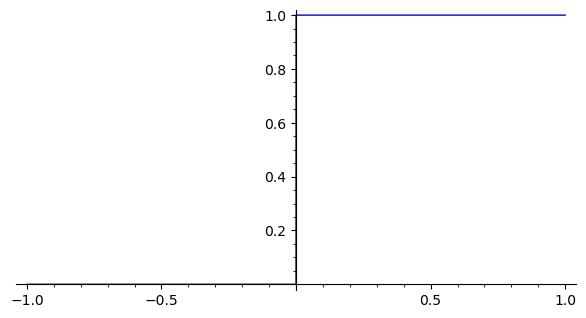

In [ ]:
plot(unit_step(x), (x, -1, 1), aspect_ratio=1)

The unit step function can be defined as the limit of $1/(1 + exp(-2 k x)$, for increasing values of $k$ to $\infty$.

In [ ]:
h(x, k) = 1/(1 + exp(-2*k*x))

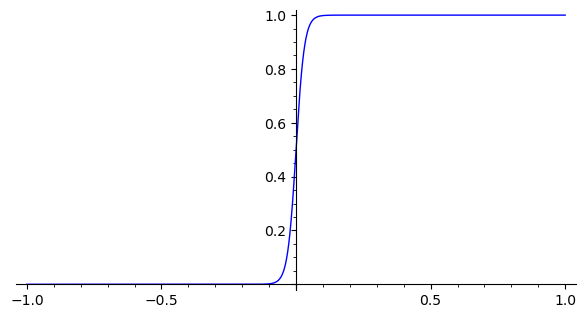

In [ ]:
plot(h(x, 32), (x, -1, 1), aspect_ratio=1)

The Heaviside function is similar to the unit step function, but with the value of $1/2$ at $x=0$.

In [ ]:
diff(unit_step(x), x)

dirac_delta(x)

In [ ]:
dirac_delta(-1)

0

In [ ]:
dirac_delta(0)

dirac_delta(0)

In [ ]:
dirac_delta(1)

0

The Dirac delta function is everywhere zero, except for a spike at the origin.

The Kronecker delta is another delta function.

In [ ]:
kronecker_delta(1, 2)

0

In [ ]:
kronecker_delta(1, 1)

1

With unit step functions, we can define a staircase function.

1. $f(x) = 0$ if $x < 0$.

2. $f(x) = 1/3$ if $x \in [0, 1)$.

3. $f(x) = 2/3$ if $x \in [1, 2)$

4. $f(x) = 1$ if $x \geq 2$.

In [ ]:
f(x) = unit_step(x)/3 + unit_step(x-1)/3 + unit_step(x-2)/3
f

x |--> 1/3*unit_step(x - 1) + 1/3*unit_step(x - 2) + 1/3*unit_step(x)

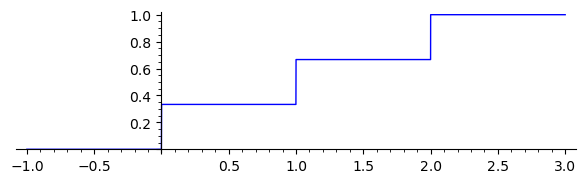

In [ ]:
plot(f(x), (x, -1, 3), aspect_ratio=1)

Alternatively, we can use ``piecewise``.  

* The ``piecewise`` takes on input a list of tuples.

* The first element of each tuple is an interval and the second element is the value of the function on that interval.

* Closed intervals are defined with [].

* Open intervals are defined with ().

In [ ]:
g = piecewise([((-infinity, 0), 0), ((0,1), 1/3), ([1,1], 1/3), ((1,2), 2/3), ([2,2], 1), ((2, infinity), 1)])
g

piecewise(x|-->0 on (-oo, 0), x|-->1/3 on (0, 1), x|-->1/3 on {1}, x|-->2/3 on (1, 2), x|-->1 on {2}, x|-->1 on (2, +oo); x)

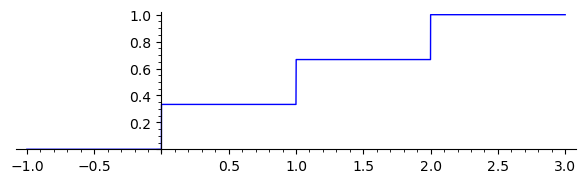

In [ ]:
plot(g(x), (x, -1, 3), aspect_ratio=1)

### Lec20

In Lecture 20 of mcs 320, we apply memoization to make recursive functions more efficient.

**1. Recursive Functions**

The Fibonacci numbers are defined as $F(0) = 0$, $F(1) = 1$,
and for $n > 1$: $F(n) = F(n-1) + F(n-2)$.

Below is a basic Python function, that follows the recursive definition.

In [ ]:
def F(n):
    """
    Returns the n-th Fibonacci number.
    """
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return F(n-1) + F(n-2)

Let us look at the first ten Fibonacci numbers.

In [ ]:
[F(k) for k in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

The main problem with the definition is that it is too inefficient.

In [ ]:
timeit('F(20)')

25 loops, best of 3: 7.92 ms per loop

In [ ]:
timeit('F(21)')

25 loops, best of 3: 13 ms per loop

In [ ]:
timeit('F(22)')

25 loops, best of 3: 21.6 ms per loop

In [ ]:
timeit('F(23)')

25 loops, best of 3: 34.5 ms per loop

Just to compute the next number in the sequence takes significantly more time.

The reason for this high cost is the repeated function calls.
Consider the computation of $F(2) = F(0) + F(1) = 0 + 1$.
As both $F(0)$ and $F(1)$ are base cases in the recursion,
the calls $F(0)$ and $F(1)$ are leaves of the binary tree of calls.

In [ ]:
L0 = LabelledBinaryTree([], label='F(0)')
L1 = LabelledBinaryTree([], label='F(1)')
L2 = LabelledBinaryTree([L0, L1], label='F(2)')
ascii_art(L2)

  _F(2)__
 /       \
F(0)      F(1)

Consider $F(3)$, $F(4)$, and $F(5)$.

In [ ]:
L3 = LabelledBinaryTree([L1, L2], label='F(3)')
L4 = LabelledBinaryTree([L2, L3], label='F(4)')
L5 = LabelledBinaryTree([L3, L4], label='F(5)')
ascii_art(L5)

       _______________F(5)_______________
      /                                  \
  ___F(3)___                       _______F(4)________
 /          \                     /                   \
F(1)        _F(2)__             _F(2)__             ___F(3)___
           /       \           /       \           /          \
          F(0)      F(1)      F(0)      F(1)      F(1)        _F(2)__
                                                             /       \
                                                            F(0)      F(1)

From the tree of function calls, we see many repeated instances
of $F(0)$ and $F(1)$.  Observe too that $F(3)$ is computed twice, 
and $F(2)$ is computed three times.

**2. Memoization in Python**

Memoization is a technique to speed up programs by storing the results of function calls.

We will memoize the Fibonacci function $F$,
using a dictionary as an extra argument of the function
to store the results of the function calls.

In [ ]:
def memoizedF(n, D={}):
    """
    All calls made to memoizedF() are stored in D.
    """
    if n in D:       # dictionary lookup
        return D[n]
    else:
        if n == 0:
            result = 0
        elif n == 1:
            result = 1
        else:
            result = memoizedF(n-1) + memoizedF(n-2)
        D[n] = result # store the result in the dictionary
        return result

Let us check the computation of the first 10 Fibonacci numbers again.

In [ ]:
[memoizedF(k) for k in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [ ]:
timeit('memoizedF(100)')

625 loops, best of 3: 217 ns per loop

**3. Memoization in SageMath**

Consider the Chebyshev polynomials, defined as
$T(0,x)=1$, $T(1,x) = x$ and for degree $n > 1$:
$T(n,x) = 2 x T(n−1,x) − T(n−2,x)$.

The Chebyshev polynomials are already available.

In [ ]:
[chebyshev_T(k,x) for k in range(10)]

[1,
 x,
 2*x^2 - 1,
 4*x^3 - 3*x,
 8*x^4 - 8*x^2 + 1,
 16*x^5 - 20*x^3 + 5*x,
 32*x^6 - 48*x^4 + 18*x^2 - 1,
 64*x^7 - 112*x^5 + 56*x^3 - 7*x,
 128*x^8 - 256*x^6 + 160*x^4 - 32*x^2 + 1,
 256*x^9 - 576*x^7 + 432*x^5 - 120*x^3 + 9*x]

Let us define our own, efficient definition of the 
Chebyshev polynomials, with the definition of a function ``T``.

Because Chebyshev polynomials are defined by two parameters:

1. ``n`` is the degree of the polynomial,

2. ``x`` is the symbol of the variable in the polynomial,

the keys of the dictionary are tuples ``(n, x)``.

In [ ]:
def T(n, x, D={}):
    """
    Memoized Chebyshev function of degree n in x.
    """
    if (n, x) in D:
        return D[(n, x)]
    else:
        if n == 0:
            result = 1
        elif n == 1:
            result = x
        else:
            result = expand(2*x*T(n-1,x) - T(n-2,x)) # normalize
        D[(n, x)] = result # store the normalized result
        return result

Observe the normalization of the Chebyshev polynomial.

In [ ]:
[T(k, x) for k in range(10)]

[1,
 x,
 2*x^2 - 1,
 4*x^3 - 3*x,
 8*x^4 - 8*x^2 + 1,
 16*x^5 - 20*x^3 + 5*x,
 32*x^6 - 48*x^4 + 18*x^2 - 1,
 64*x^7 - 112*x^5 + 56*x^3 - 7*x,
 128*x^8 - 256*x^6 + 160*x^4 - 32*x^2 + 1,
 256*x^9 - 576*x^7 + 432*x^5 - 120*x^3 + 9*x]

In [ ]:
timeit('T(100, x)')

625 loops, best of 3: 474 ns per loop

As before, we see that this memoized version is very efficient.

### Lec21

In lecture 21 of mcs 320, we work with functions.

**1. Expressions in Many Variables**

Consider the definition of the following sequence of polynomials.

$$
   f_i = x_i^3 + \left(
     \sum_{ \scriptsize \begin{array}{c}
                j=1 \\
                j \not=i
            \end{array} }^n (i + j + 1) x_j \right) - 1,
   \quad i=1,2,\ldots, n.
$$

Let us look at a specific value for $n$.

In [ ]:
n = 4

As it should work for any number of variables, we define a list of variables ``X``.

In [ ]:
X = [var('x%d' % k) for k in range(1, n+1)]
X

[x1, x2, x3, x4]

Keep in mind that lists start with index 0, so ``X[0]`` is ``x1``.

Let us define a function for the first expression.

In [ ]:
i = 1

The function depends on ``i`` and ``n``.  Instead of defining the function with ``f(i, n) = ``, we must us ``lambda`` to prevent evaluation.

In [ ]:
f = lambda i, n: X[i-1]^3 + sum((i+j+1)*X[j-1] for j in range(1, n+1)) - (2*i+1)*X[i-1] - 1
f(1, 4)

x1^3 + 4*x2 + 5*x3 + 6*x4 - 1

In [ ]:
F = [f(i, 4) for i in range(1, 5)]
F

[x1^3 + 4*x2 + 5*x3 + 6*x4 - 1,
 x2^3 + 4*x1 + 6*x3 + 7*x4 - 1,
 x3^3 + 5*x1 + 6*x2 + 8*x4 - 1,
 x4^3 + 6*x1 + 7*x2 + 8*x3 - 1]

**2. Polynomials in Several Variables**

A polynomial in $n$ variables $x_1, x_2, \ldots, x_n$ with $m$ terms is defined by

1. a list of $m$ coefficients, let us take rational numbers,

2. a list of $m$ exponent tuples, each tuple is defined by $n$ natural numbers.

In the example below, we take $n = 5$ and $m = 8$.

In [ ]:
(n, m) = (5, 8)

In [ ]:
X = [var('x%d' % k) for k in range(1, n+1)]
X

[x1, x2, x3, x4, x5]

In [ ]:
set_random_seed(20230707)

The coefficients are stored in the list ``C``.

In [ ]:
C = [QQ.random_element() for _ in range(m)]
C

[0, -2, 1/2, -1/2, -6, 0, -3, -7/3]

In [ ]:
E = [tuple([abs(ZZ.random_element()) for _ in range(n)]) for _ in range(m)]
E

[(1, 0, 1, 1, 2),
 (1, 0, 4, 1, 1),
 (4, 0, 2, 1, 1),
 (3, 7, 0, 1, 2),
 (0, 1, 0, 36, 1),
 (4, 1, 0, 1, 36),
 (0, 1, 0, 0, 1),
 (1, 8, 1, 2, 13)]

We use ``prod`` to make the first monomial.

In [ ]:
prod(X[k]^E[0][k] for k in range(n))

x1*x3*x4*x5^2

It is good to have a helper function to define a monomial.

In [ ]:
monomial = lambda x, e: prod(x[k]^e[k] for k in range(len(x)))
monomial(X, E[0])

x1*x3*x4*x5^2

In [ ]:
p = lambda x, c, e: sum(c[k]*monomial(x, e[k]) for k in range(len(c)))

In [ ]:
p(X, C, E)

-6*x2*x4^36*x5 - 7/3*x1*x2^8*x3*x4^2*x5^13 - 1/2*x1^3*x2^7*x4*x5^2 + 1/2*x1^4*x3^2*x4*x5 - 2*x1*x3^4*x4*x5 - 3*x2*x5

To verify, let us look at the coefficients and the exponents.

In [ ]:
C

[0, -2, 1/2, -1/2, -6, 0, -3, -7/3]

In [ ]:
E

[(1, 0, 1, 1, 2),
 (1, 0, 4, 1, 1),
 (4, 0, 2, 1, 1),
 (3, 7, 0, 1, 2),
 (0, 1, 0, 36, 1),
 (4, 1, 0, 1, 36),
 (0, 1, 0, 0, 1),
 (1, 8, 1, 2, 13)]

**3. Function Composition**

Consider the trajectory of a projectile in space modeled by a parabola,
subject to the following constraints.  At time $t = 0$ it is launched from
the ground and at time $t = 45$ it hits the ground 120 miles further.
Assuming constant horizontal speed we create a function $f(t)$ to give
the altitude of the projectile in function of time.
First we model the shape of the trajectory.

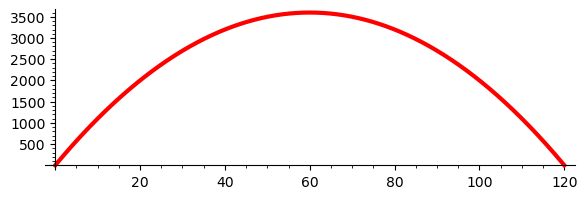

In [ ]:
y(x) = x*(120 - x)
plot(y(x), (x, 0, 120), aspect_ratio=1/100, thickness=3, color='red')

Now we want a function in time $t$.
The assumption of constant horizontal speed implies that $x$ is just a rescaling of $t$.
This means that when $t = 45$, x must be 120.

In [ ]:
x(t) = 120/45*t
print('x at 0 :', x(0))
print('x at 45 :', x(45))

x at 0 : 0
x at 45 : 120


Then the altitude is given as the composition of $y$ after $x$.

In [ ]:
f(t) = y(x(t))
print('altitude at 0 :', f(0))
print('altitude at 22.5 :', f(22.5))
print('altitude at 45 :', f(45))

altitude at 0 : 0
altitude at 22.5 : 3600.00000000000
altitude at 45 : 0


Finally, we plot the altitude as a function of time.

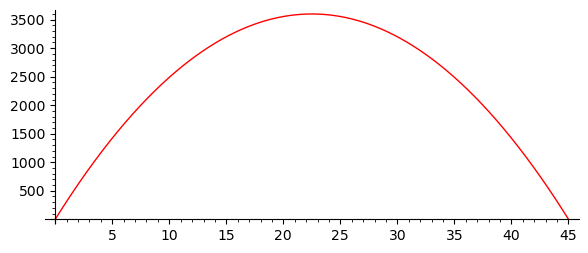

In [ ]:
plot(f(t), (t, 0, 45), aspect_ratio=1/200, ticks=5, color='red')

**4. The Newton Operator**

The Newton operator defined below takes on input a function and returns a function.

In [ ]:
def newton_step(f, x):
    """
    Returns the function that will perform one Newton step
    to solve the equation f(x) = 0.
    """
    n(x) = x - f(x)/diff(f,x)
    return n

As an example, consider the computation of the square root of 2.

In [ ]:
sqr(x) = x^2 - 2
our_sqrt = newton_step(sqr, x)
our_sqrt

x |--> x - 1/2*(x^2 - 2)/x

In [ ]:
s1 = our_sqrt(2)
s1

3/2

In [ ]:
s2 = our_sqrt(s1)
s2

17/12

In [ ]:
s3 = our_sqrt(s2)
s3

577/408

In [ ]:
d3 = sqrt(2) - s3
d3.n(digits=8)

-2.1234155e-6

In [ ]:
s4 = our_sqrt(s3)
d4 = sqrt(2) - s4
print(s4, 'has error', d4.n(digits=12))

665857/470832 has error -1.59161572810e-12


Starting from an integer approximation, we obtain a sequence of quadratically converging rational approximations.  The quadratic convergence means that the accuracy doubles in each step.

### Lec22

In lecture 22 of mcs 320, we consider symbolic, numeric, and implicit differentiation.

**1. Symbolic Differentiation**

Consider an expression ``f`` which depends on ``x``.

In [ ]:
f = sin(2*pi*x)
f

sin(2*pi*x)

Let us compute the value of the derivative of ``f`` at ``x = 1``.

In [ ]:
f1 = diff(f, x)
f1

2*pi*cos(2*pi*x)

In [ ]:
f1(x = 1)

2*pi

We can compute the 5-th derivative as follows:

In [ ]:
diff(f, x, 5)

32*pi^5*cos(2*pi*x)

or via the method ``diff`` applied to the expression ``f``.

In [ ]:
f.diff(x, 5)

32*pi^5*cos(2*pi*x)

With functions in several variables, we can compute the derivatives all at once.  Consider a random polynomial with rational coefficients in the variables ``x`` and ``y``.

In [ ]:
P.<x,y> = QQ[]
q = P.random_element(degree=5, terms=8)
q

x^4*y - 2*y^5 + 4*x^4 - 1/3*x^3*y - 1/7*x^2*y + 3/16*x - 1

In [ ]:
f(x,y) = SR(q).subs({x: x, y: y})
f

(x, y) |--> x^4*y - 2*y^5 + 4*x^4 - 1/3*x^3*y - 1/7*x^2*y + 3/16*x - 1

In [ ]:
g = f.diff()
g

(x, y) |--> (4*x^3*y + 16*x^3 - x^2*y - 2/7*x*y + 3/16, x^4 - 10*y^4 - 1/3*x^3 - 1/7*x^2)

Observe that ``g`` is a function which returns a tuple.  The ``g`` is the *gradient* of ``f``.

In [ ]:
h = g.diff()
h

[(x, y) |--> 12*x^2*y + 48*x^2 - 2*x*y - 2/7*y               (x, y) |--> 4*x^3 - x^2 - 2/7*x]
[              (x, y) |--> 4*x^3 - x^2 - 2/7*x                           (x, y) |--> -40*y^3]

In [ ]:
type(h)

<class 'sage.matrix.matrix_generic_dense.Matrix_generic_dense'>

Observe that ``h`` is a matrix.  The matrix of all partial derivatives of a function in several variables is called the *Hessian* of the function.

**2. Numeric Differentiation**

Numeric differentiation is available as ``derivative`` of ``scipy.misc``.

In [ ]:
from scipy.misc import derivative as numdiff

Let us apply this to the problem of computing the derivative of ``sin(2*pi*x)`` at ``x = 1``.

For this to work properly, we have to use the ``sin`` and ``pi`` of ``numpy``.

In [ ]:
import numpy

In [ ]:
nf = lambda x: numpy.sin(2*numpy.pi*x)

In [ ]:
numdiff(nf, 1.0, dx=1.0e-2)

6.279051952931303

The value for ``dx`` defines the step size $h$.

We can improve on the numerical value by decreasing the step size and taking more points, specifying the value for ``order``.

In [ ]:
numdiff(nf, 1.0, dx=1.0e-4, order=5)

6.283185307180939

In [ ]:
2*numpy.pi

6.283185307179586

**3. Implicit Differentiation**

Take a random point on the unit circle and compute the slope of the tangent line.

In [ ]:
x, y = var('x, y')
circle = x^2 + y^2 - 1
circle

x^2 + y^2 - 1

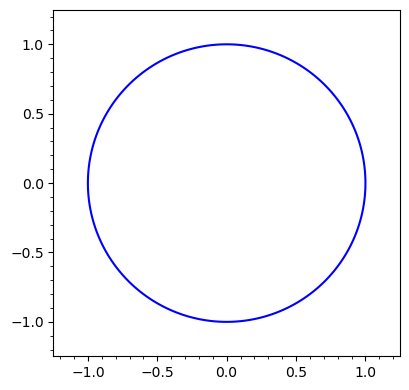

In [ ]:
plotcircle = implicit_plot(circle, (x, -1.2, 1.2), (y, -1.2, 1.2), aspect_ratio=1)
show(plotcircle)

A random point on the unit circle is defined by $(\cos(t), \sin(t))$ for $t$ a random angle in $[-\pi, \pi[$.

In [ ]:
angle = RR(pi)*RR.random_element()
angle

-1.85589892691278

In [ ]:
(a, b) = (cos(angle), sin(angle))
(a, b)

(-0.281255911213967, -0.959632800818730)

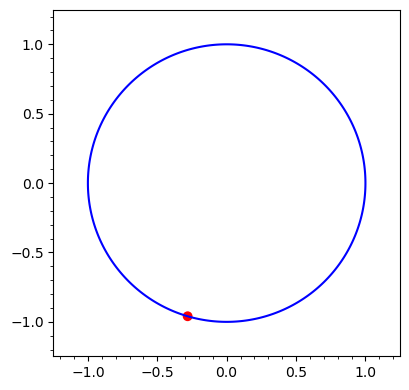

In [ ]:
plotpoint = point((a, b), size='50', color='red')
show(plotcircle + plotpoint)

Now we want to compute the tangent line through the point on the circle. 

To apply implicit differentiation, we must declare ``y(x)``, that is ``y`` as a function of ``x``.  For this function, we introduce a new variable ``Y``.

In [ ]:
Y = function('Y')(x)
print(Y, 'has type', type(Y))

Y(x) has type <class 'sage.symbolic.expression.Expression'>


In [ ]:
dy = diff(Y, x)
dy

diff(Y(x), x)

In [ ]:
Ycircle = circle(y=Y)
Ycircle

x^2 + Y(x)^2 - 1

In [ ]:
dc = diff(Ycircle, x)
dc

2*Y(x)*diff(Y(x), x) + 2*x

In [ ]:
sol = solve(dc, dy)
sol

[diff(Y(x), x) == -x/Y(x)]

In [ ]:
solrhs = sol[0].rhs()
solrhs

-x/Y(x)

In [ ]:
slope = solrhs.subs({x: a}).subs({Y(x=a): b})
slope

-0.293087013047082

In [ ]:
tangent = y - b - slope*(x - a)
tangent

0.293087013047082*x + y + 1.04206525573827

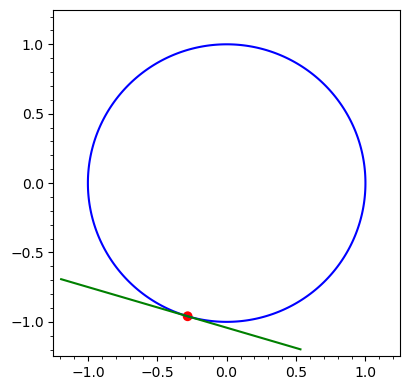

In [ ]:
plotline = implicit_plot(tangent, (x, -1.2, 1.2), (y, -1.2, 1.2), color='green')
show(plotcircle+plotpoint+plotline)

### Lec23

In Lecture 23 of MCS 320, we consider integration and summation.

**1. Symbolic and Numeric Integration**

If a symbolic antiderivative exists, then we can interchange ``diff`` with ``integral``.

In [ ]:
f = cos(x)

In [ ]:
diff(f, x)

-sin(x)

In [ ]:
integral(f, x)

sin(x)

In [ ]:
diff(integral(f,x),x)

cos(x)

In [ ]:
integral(diff(f,x),x)

cos(x)

In many cases, a symbolic antiderivative does not exist.

In [ ]:
e = cos(exp(x^2))
integral(e, x)

integrate(cos(e^(x^2)), x)

We can ask to compute a numerical approximation for the definite integral.  First we can define the symbolic expression of the integral and specify the ``hold = True`` which does not evaluate the function call.

In [ ]:
ie = integral(e, (x, 0, 1), hold=True)
show(ie)

integrate(cos(e^(x^2)), x, 0, 1)

A numerical approximation with 16 decimal places is computed below.

In [ ]:
ie.n(digits=16)

0.1128234569369889

**2. Symbolic Bounds**

If a symbolic antiderivate exists, then we can apply the fundamental theorem of calculus.

Let $F(x) = \int f(x) dx$, then

$$
    \int_a^b f(x) dx = F(b) - F(a).
$$

Let us try to apply this with $f = 1/x^2$.

In [ ]:
f(x) = 1/x^2
F = integral(f, x)
F

x |--> -1/x

In [ ]:
a, b = var('a, b')
ie = integral(f, (x, a, b), hold=True)
show(ie)

integrate(x^(-2), x, a, b)

In [ ]:
F(b) - F(a)

1/a - 1/b

Removing the hold on the integral does not work!

In [ ]:
# ie.unhold() # remove comment to see the error message 

The reason for this error can be explained by a plot.

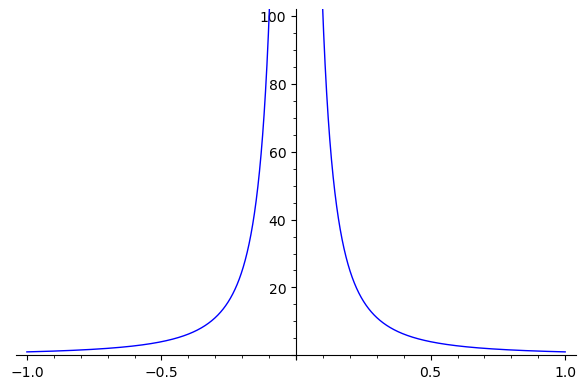

In [ ]:
plot(1/x^2, (x, -1, 1), ymax=100)

The integral can be computed formally by adding assumptions on the bounds.

In [ ]:
assume(a > 0, b > a)

In [ ]:
ie.unhold()

1/a - 1/b

**3. Summation and Limits**

In [ ]:
k, n = var('k, n')
S = sum(k, k, 1, n, hold=True)
show(S)

sum(k, k, 1, n)

In [ ]:
s = S.unhold()
show(s)

1/2*n^2 + 1/2*n

In [ ]:
f = factor(s)
show(f)

1/2*(n + 1)*n

Let us look at the geometric sum, for some ratio ``r``.

In [ ]:
r = var('r')

In [ ]:
S = sum(r^k, k, 0, n, hold=True)
s = S.unhold()
show(S,'=' ,s)

sum(r^k, k, 0, n) '=' (r^(n + 1) - 1)/(r - 1)

What happens if ``r`` becomes one?

In [ ]:
s.limit(r=1)

n + 1

Another type of limit considers sums with an infinite number of terms.

In [ ]:
sum(1/k^2, k, 1, oo)

1/6*pi^2

The ``oo`` stands for $\infty$.  The above sum is equivalent to a limit.

In [ ]:
S = sum(1/k^2, k, 1, n)
S.limit(n = oo)

limit(harmonic_number(n, 2), n, +Infinity)

The Harmonic numbers are sums of reciprocals of the first positive integers.

### Lec24

In Lecture 24 of MCS 320, we consider Taylor series to approximate functions.

**1. Taylor Series**

We can define Taylor series formally on any function ``f`` in ``x``.

In [ ]:
f = function('f')(x) # function with name f in x

Let us develop about ``x = a``, for some symbol ``a``.

In [ ]:
a = var('a') 

In [ ]:
tf = taylor(f, x, a, 4)
tf

1/24*(a - x)^4*diff(f(a), a, a, a, a) - 1/6*(a - x)^3*diff(f(a), a, a, a) + 1/2*(a - x)^2*diff(f(a), a, a) - (a - x)*diff(f(a), a) + f(a)

In [ ]:
type(tf)

<class 'sage.symbolic.expression.Expression'>

In [ ]:
tcos = taylor(cos(x), x, 0, 4)
tcos

1/24*x^4 - 1/2*x^2 + 1

In [ ]:
pcos = tcos.power_series(QQ)
pcos

1 - 1/2*x^2 + 1/24*x^4 + O(x^5)

In [ ]:
type(pcos)

<class 'sage.rings.power_series_poly.PowerSeries_poly'>

Because ``pcos`` is a power series, we can ask for its multiplicative inverse.

In [ ]:
icos = pcos.inverse()
icos

1 + 1/2*x^2 + 5/24*x^4 + O(x^5)

In [ ]:
pcos*icos

1 + O(x^5)

In [ ]:
icos*pcos

1 + O(x^5)

**2. Taylor Series in Several Variables**

As an application, consider the computation of the tangent line at any point at the unit circle.

In [ ]:
x, y = var('x, y')

In [ ]:
circle = x^2 + y^2 - 1

The coordinates of the point can be left as variables ``a`` and ``b``.

In [ ]:
a, b = var('a, b')

In [ ]:
ts = taylor(circle, (x, a), (y, b), 1)
ts

-2*(a - x)*a + a^2 - 2*(b - y)*b + b^2 - 1

Let us make a plot to geometrically verify the formula.

In [ ]:
angle = RR(pi)*RR.random_element()
(A, B) = (cos(angle), sin(angle))
(A, B)

(0.588438359127057, 0.808542081470010)

In [ ]:
tline = ts(a = A, b = B)
tline

1.17687671825411*x + 1.61708416294002*y - 2.00000000000000

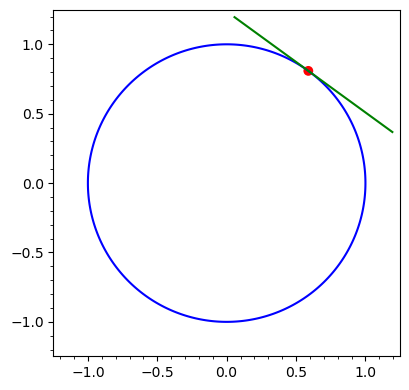

In [ ]:
pc = implicit_plot(circle, (x, -1.2, 1.2), (y, -1.2, 1.2), aspect_ratio=1)
pp = point((A, B), size=50, color='red')
pL = implicit_plot(tline, (x, -1.2, 1.2), (y, -1.2, 1.2), color='green')
show(pc+pp+pL)

**3. Approximations**

Consider a truncated Taylor series to approximate ``sin(x)``.

In [ ]:
tsin = taylor(sin(x), x, 0, 9)
tsin

1/362880*x^9 - 1/5040*x^7 + 1/120*x^5 - 1/6*x^3 + x

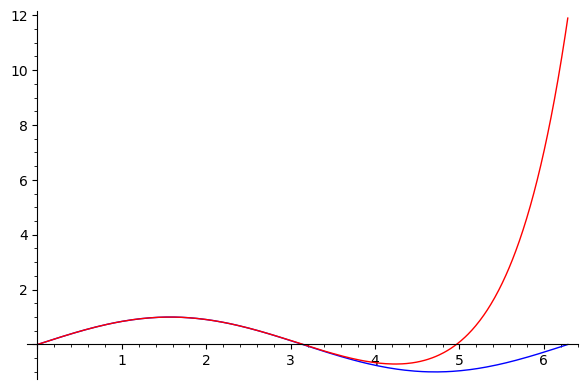

In [ ]:
plotsin = plot(sin(x), (x, 0, 2*pi))
plotser = plot(tsin(x=x), (x, 0, 2*pi), color='red')
show(plotsin+plotser)

The Taylor series is sufficiently good locally, but not over the entire interval.

A rational approximation give getter results.

In [ ]:
P.<z> = PowerSeriesRing(QQ)
P

Power Series Ring in z over Rational Field

In [ ]:
pd = sin(z).pade(5,5)
pd

(551/75*z^5 - 1484/5*z^3 + 11088/5*z)/(z^4 + 364/5*z^2 + 11088/5)

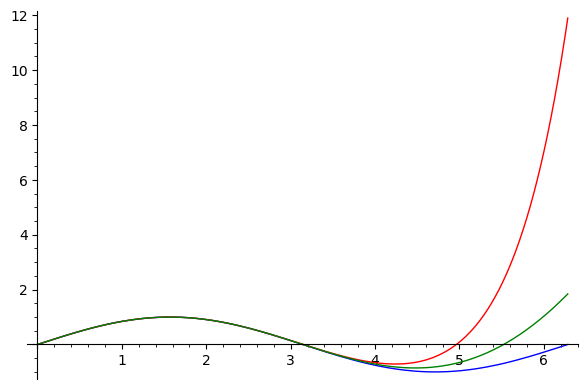

In [ ]:
plotpade = plot(pd(z=x), (x, 0, 2*pi), color='green')
show(plotsin+plotser+plotpade)

The rational approximation agrees with the series locally, but gives better global results.

**4. Series in SymPy**

The ``series`` in SymPy can be computed with a generator.

In [ ]:
import sympy as sp

In [ ]:
sersin = sp.series(sin(x), x0=0, n=None)
sersin

<generator object Expr.series.<locals>.<genexpr> at 0x7f4ea523b450>

In [ ]:
next(sersin)

x

In [ ]:
next(sersin)

-x**3/6

In [ ]:
next(sersin)

x**5/120

Applying ``next()`` to the generator we get the next term in the series.

### Lec25

In lecture 25 of MCS 320, we consider symbolic-numeric computing

**1. Interval Arithmetic**

What is the right precision to obtain accurate results?

To motivate the use of interval arithmetic, we take an example
from the paper of Stefano Taschini in the proceedings of SciPy 2008.
We convert the floating-point coefficients to rational numbers.

In [ ]:
F(x,y) = (QQ(333.75) - x**2)*y**6 + x**2*(11*x**2*y**2 - 121*y**4 - 2) + QQ(5.5)*y**8 + x/(2*y)
F

In [ ]:
(A, B) = (77617, 33096)
exact = F(A, B)
exact

In [ ]:
exact.n(digits=10)

In [ ]:
[F(A.n(digits=d), B.n(digits=d)) for d in range(10, 40)]

We see that we eventually get to an accurate result.  However, observe the plateaus which could give the impression that, as the result no longer changes, we have reached an accurate result.

In [ ]:
RIF

In [ ]:
y = F(RIF(A), RIF(B))
y

To see better the range of numbers, we ask to see the number in the ``brackets`` style.

In [ ]:
RIF(y).str(style='brackets')

Observe the magnitude of the numbers.  The range of the interval is huge!

In [ ]:
R100 = RealIntervalField(prec=100)
R100

In [ ]:
y100 = F(R100(A), R100(B))
R100(y100).str(style='brackets')

After doubling the precision to 100 bits, observe that the magnitude dropped from $10^{21}$ down to $10^7$.

In [ ]:
R200 = RealIntervalField(prec=200)
y200 = F(R200(A), R200(B))
R200(y200).str(style='brackets')

Working with 200 bits gives an accurate result.  The side of the interval gives a bound on the error.

In [ ]:
y200

In [ ]:
ry200 = R200(y200)
ry200.upper() - ry200.lower()

The error is defined as the difference between the upper and lower limit of the interval and we see that we have about 24 correct decimal places.

**2. Symbolic-Numeric Factorization**

In a numeric factorization of a polynomial in one variable, we compute the complex roots of the polynomial.  In a symbolic factorization, we extend the field of rational numbers with algebraic number till the polynomial factors as a product of linear forms.

A symbolic-numeric factorization works over the ``QQbar`` number field, which uses the complex interval field.

In [ ]:
P.<x> = PolynomialRing(QQbar)
P

In [ ]:
q = x^3 + x + 1
f = factor(q)
f

In [ ]:
q.roots(QQbar)

If we want a more accurate symbolic-numeric factorization, then we can compute the roots at a higher precision, for example with 200 bits.

In [ ]:
C = ComplexIntervalField(prec=200)
C

In [ ]:
q.roots(C)

**3. Constrained Optimization**

To end the ``calculus`` chapter and to transition into the solving chapter, consider a problem of constrained optimization.

In [ ]:
x, y, z = var('x, y, z')
target = x^2 + 2*x*y*z - z^2
constraint = x^2 + y^2 + z^2 - 1 == 0
print('optimize', target, 'subject to', constraint)

Let us make plot, for the value of the target equal to two.

In [ ]:
tplot = implicit_plot3d(target-2, (x,-2,2), (y,-2,2), (z,-2,2), color='red')
cplot = implicit_plot3d(constraint.lhs(), (x,-2,2), (y,-2,2), (z,-2,2))
show(tplot+cplot)

If the value of the target equals one, then we see that the red sheets touch the blue ball.

In [ ]:
tplot = implicit_plot3d(target-1, (x,-2,2), (y,-2,2), (z,-2,2), color='red')
cplot = implicit_plot3d(constraint.lhs(), (x,-2,2), (y,-2,2), (z,-2,2))
show(tplot+cplot)

To apply the method of Lagrange multipliers we need the gradients.

In [ ]:
ft(x,y,z) = target
fc(x,y,z) = constraint.lhs()
print('target as function :', ft)
print('constraint as function :', fc)

In [ ]:
gt = ft.diff()
gt

In [ ]:
gc = fc.diff()
gc

Now we set up the system.  Because ``lambda`` is reserved in Python, using ``lambda`` as the name of a variable is wrong.

In [ ]:
w = var('w')
eqs = [gt(x,y,z)[k] - w*gc(x,y,z)[k] == 0 for k in range(3)]
eqs.append(constraint)
eqs

Observe that the constraint was appended to the list of equations.  We then just solve.

In [ ]:
sols = solve(eqs,[x,y,z,w])
sols

To evaluate the solutions at the target, we must convert the coordinates of the solutions into tuples and drop the value for w.

In [ ]:
[sol for sol in sols]

In [ ]:
L = [[e.rhs() for e in sol] for sol in sols]
L

In [ ]:
T = [tuple(e[0:3]) for e in L]
T

In [ ]:
[ft(x,y,z) for (x,y,z) in T]

This problem has two maxima, valued at 1, and two minima, with value -1.

### Lec26

In Lecture 26 of MCS 320, we consider two dimensional plots.

**1. The Graph of a Function**

The ``plot`` function takes functions ``y = f(x)``.

In [ ]:
f = exp(-x^2)*sin(pi*x^3)
f

e^(-x^2)*sin(pi*x^3)

By assigning the output of ``plot`` to a variable, we separate the computation of the plot from the display.

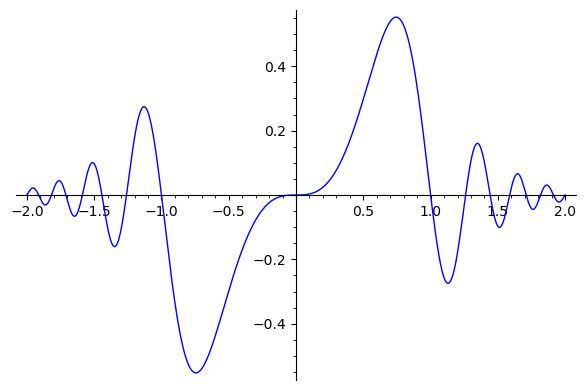

In [ ]:
pf = plot(f, (x, -2, 2))
show(pf)

The amplitude is defined by $\pm \exp(-x^2)$, let us add these two functions.

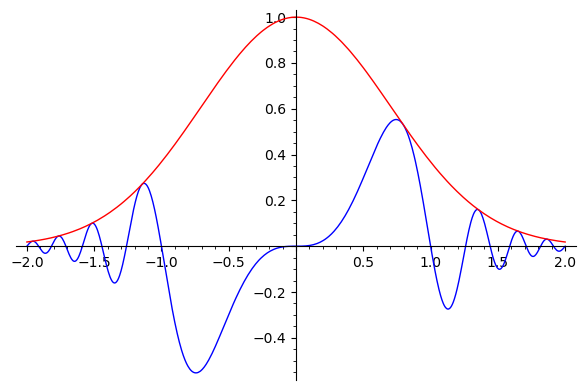

In [ ]:
fplus = plot(exp(-x^2), (x, -2, 2), color='red')
show(pf+fplus)

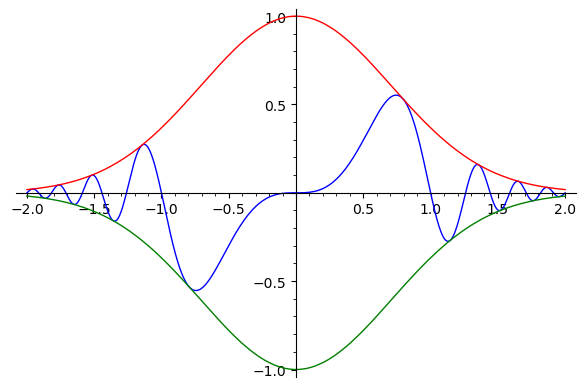

In [ ]:
fminus = plot(-exp(-x^2), (x, -2, 2), color='green')
show(pf+fplus+fminus)

Consider another example.

In [ ]:
g = 1/(x^3 - x)

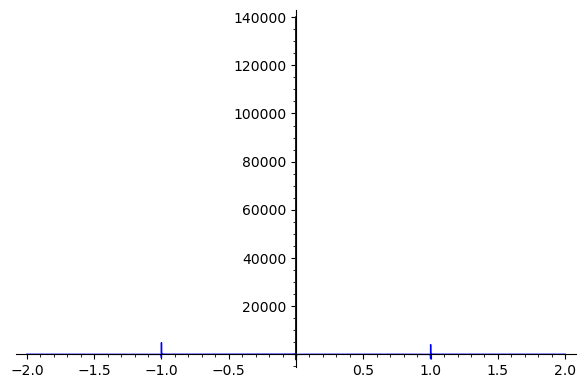

In [ ]:
plot(g, (x, -2, 2))

This is not an enteresting plot.  One improvement is to provide bounds on the $y$-values.

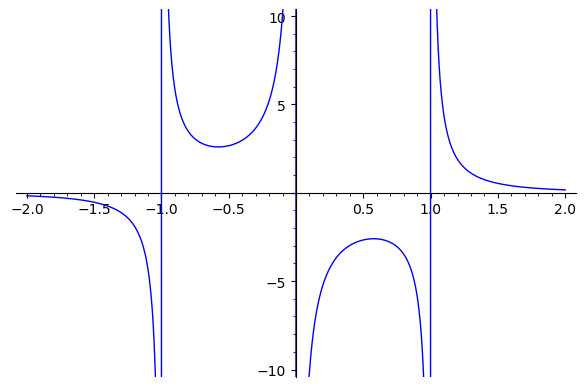

In [ ]:
plot(g, (x, -2, 2), ymin=-10, ymax= 10)

The best plot for this example is when we ask to show the poles, which then displays the asymptotes.

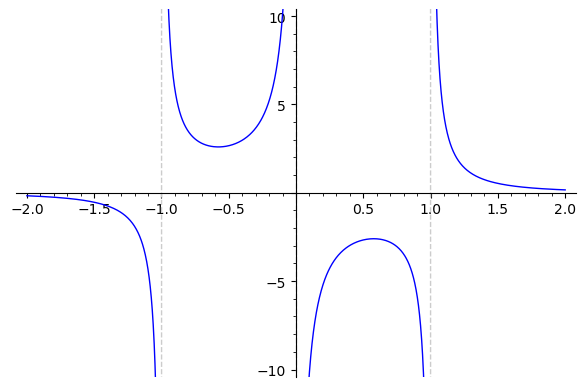

In [ ]:
plot(g, (x, -2, 2), ymin=-10, ymax= 10, detect_poles='show')

**2. Implicit Plots**

Many intesting curves are defined by equations $f(x,y) = 0$.  Consider a curve invented by James Watt.

In [ ]:
x, y = var('x, y')
watt = (x^2+y^2)^3 + 5.12*(x^2+y^2)^2 - 5.15*(x^4-y^4) - 14.7456*y^2
watt

-5.15000000000000*x^4 + 5.15000000000000*y^4 + (x^2 + y^2)^3 + 5.12000000000000*(x^2 + y^2)^2 - 14.7456000000000*y^2

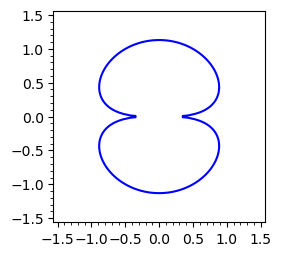

In [ ]:
implicit_plot(watt, (x, -1.5, 1.5), (y, -1.5, 1.5)).show(figsize=4) 

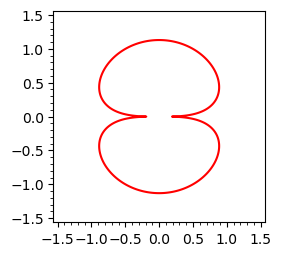

In [ ]:
implicit_plot(watt, (x, -1.5, 1.5), (y, -1.5, 1.5), plot_points = 2000, color='red').show(figsize=4)

Observe the difference between the two plots.  When we use more points in the plot, the plot approaches the origin more.  But does the origin belong to the curve?

In [ ]:
watt(x=0, y=0)

0

Yes it does!

**3. Parametric Plots**

If the curve is defined by two functions $x(t)$ and $y(t)$ for the two coordinates $(x = x(t), y = y(t))$, then the plotting can be done efficiently and accurately.  Consider a Lissajous curve.

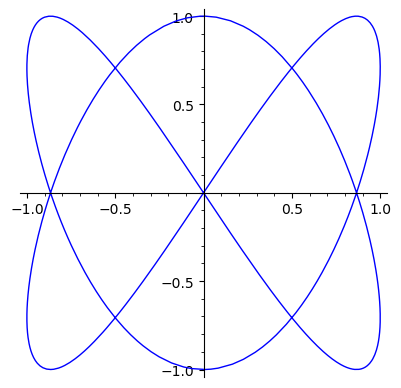

In [ ]:
t = var('t')
parametric_plot((sin(2*t), sin(3*t)), (t, 0, 2*pi))

**4. Polar Plots**

In polar coordinates, a curve is represented by $r = f(t)$, with 

$$
    x = r \cos(t) \quad \mbox{and} \quad y = r \sin(t),
$$

where 

1. $r$ is the radius of the point $(x, y)$, its distance from the origin; and

2. $t$ is its argument, the angle of the vector ending in $(x,y)$ with the $x$-axis.

Let us compute the polar representation of the curve defined in ``watt``.

In [ ]:
watt

-5.15000000000000*x^4 + 5.15000000000000*y^4 + (x^2 + y^2)^3 + 5.12000000000000*(x^2 + y^2)^2 - 14.7456000000000*y^2

In [ ]:
r, t = var('r, t')
pwatt = watt(x = r*cos(t), y = r*sin(t))
pwatt

-5.15000000000000*r^4*cos(t)^4 + 5.15000000000000*r^4*sin(t)^4 - 14.7456000000000*r^2*sin(t)^2 + (r^2*cos(t)^2 + r^2*sin(t)^2)^3 + 5.12000000000000*(r^2*cos(t)^2 + r^2*sin(t)^2)^2

Observe the $\cos(t)^2 + \sin(t)^2$ which can be simplified to one.  Let us simplify before solving.

In [ ]:
spwatt = pwatt.trig_simplify()
spwatt

-1/4044180699863300*r^4*sin(t)^4 + r^6 - 1213254209959/40441806998633*r^4 + 2/25276129374145625*(130172066276849975*r^4 - 186355846649700864*r^2)*sin(t)^2

In [ ]:
sol = solve(spwatt,r)
sol

[r == -1/10*sqrt(1/80883613997266*sin(t)^4 - 20827530604295996/40441806998633*sin(t)^2 + 1/80883613997266*sqrt(sin(t)^8 - 83310122417183984*sin(t)^6 + 1735144124291545345496293968519864*sin(t)^4 + 954572963783593651936794875955136*sin(t)^2 + 14719857779832372547816810000) + 60662710497950/40441806998633), r == 1/10*sqrt(1/80883613997266*sin(t)^4 - 20827530604295996/40441806998633*sin(t)^2 + 1/80883613997266*sqrt(sin(t)^8 - 83310122417183984*sin(t)^6 + 1735144124291545345496293968519864*sin(t)^4 + 954572963783593651936794875955136*sin(t)^2 + 14719857779832372547816810000) + 60662710497950/40441806998633), r == -1/10*sqrt(1/80883613997266*sin(t)^4 - 20827530604295996/40441806998633*sin(t)^2 - 1/80883613997266*sqrt(sin(t)^8 - 83310122417183984*sin(t)^6 + 1735144124291545345496293968519864*sin(t)^4 + 954572963783593651936794875955136*sin(t)^2 + 14719857779832372547816810000) + 60662710497950/40441806998633), r == 1/10*sqrt(1/80883613997266*sin(t)^4 - 20827530604295996/40441806998633*sin(t)

In [ ]:
len(sol)

5

Observe that ``r == 0`` is one of the factors.  So we see that the curve passes through the origin.

In [ ]:
f1 = sol[0].rhs()
f1

-1/10*sqrt(1/80883613997266*sin(t)^4 - 20827530604295996/40441806998633*sin(t)^2 + 1/80883613997266*sqrt(sin(t)^8 - 83310122417183984*sin(t)^6 + 1735144124291545345496293968519864*sin(t)^4 + 954572963783593651936794875955136*sin(t)^2 + 14719857779832372547816810000) + 60662710497950/40441806998633)

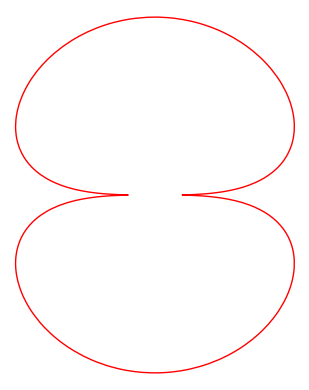

In [ ]:
p1 = polar_plot(f1, (t, 0, 2*pi), color='red')
p1.show(axes=False)

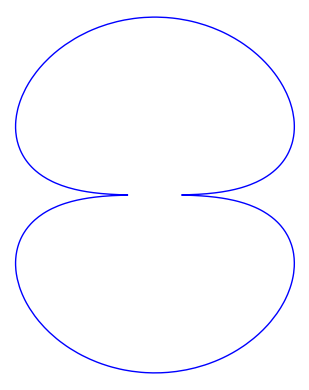

In [ ]:
f2 = sol[1].rhs()
p2 = polar_plot(f2, (t, 0, 2*pi))
p2.show(axes=False)

In [ ]:
f3 = sol[2].rhs()
f3

-1/10*sqrt(1/80883613997266*sin(t)^4 - 20827530604295996/40441806998633*sin(t)^2 - 1/80883613997266*sqrt(sin(t)^8 - 83310122417183984*sin(t)^6 + 1735144124291545345496293968519864*sin(t)^4 + 954572963783593651936794875955136*sin(t)^2 + 14719857779832372547816810000) + 60662710497950/40441806998633)

verbose 0 (3839: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 198 points.
verbose 0 (3839: plot.py, generate_plot_points) Last error message: 'math domain error'


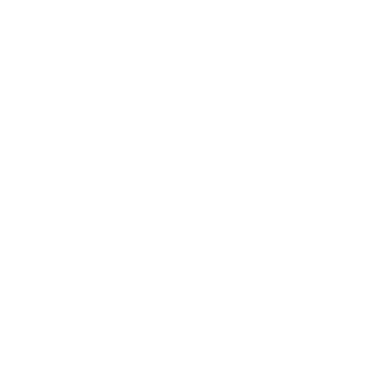

In [ ]:
p3 = polar_plot(f3, (t, 0, 2*pi))
p3.show(axes=False)

In [ ]:
[f3(t=2*RR(pi)*k/10.0) for k in range(10)]

[0,
 -1.31743435377368e-16 - 2.15153357636002*I,
 -1.98892849598223e-16 - 3.24816673242766*I,
 -1.98892849598223e-16 - 3.24816673242766*I,
 -1.31743435377368e-16 - 2.15153357636002*I,
 0,
 -1.31743435377368e-16 - 2.15153357636002*I,
 -1.98892849598223e-16 - 3.24816673242766*I,
 -1.98892849598223e-16 - 3.24816673242766*I,
 -1.31743435377368e-16 - 2.15153357636002*I]

In [ ]:
f4 = sol[3].rhs()
f4

1/10*sqrt(1/80883613997266*sin(t)^4 - 20827530604295996/40441806998633*sin(t)^2 - 1/80883613997266*sqrt(sin(t)^8 - 83310122417183984*sin(t)^6 + 1735144124291545345496293968519864*sin(t)^4 + 954572963783593651936794875955136*sin(t)^2 + 14719857779832372547816810000) + 60662710497950/40441806998633)

In [ ]:
[f4(t=2*RR(pi)*k/10.0) for k in range(10)]

[0,
 1.31743435377368e-16 + 2.15153357636002*I,
 1.98892849598223e-16 + 3.24816673242766*I,
 1.98892849598223e-16 + 3.24816673242766*I,
 1.31743435377368e-16 + 2.15153357636002*I,
 0,
 1.31743435377368e-16 + 2.15153357636002*I,
 1.98892849598223e-16 + 3.24816673242766*I,
 1.98892849598223e-16 + 3.24816673242766*I,
 1.31743435377368e-16 + 2.15153357636002*I]

The third and fourth component cannot be plotted because of the complex values.

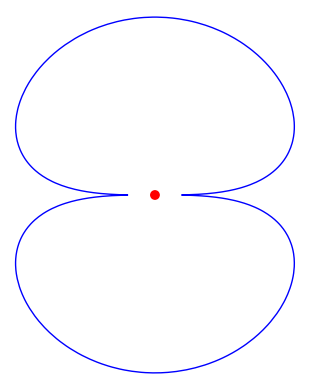

In [ ]:
pt = point((0,0), color='red', size=50)
(p2+pt).show(axes=False)

As a *real* curve, the origin is an isolated point!

### Lec27

In Lecture 27 of MCS 320, we make three dimensional plots.

**1. Surfaces**

Surfaces can be defined explicitly, by a function $z = f(x,y)$, or implicitly by an equation.

Consider the surface $z = \cos(x y)$, for $x \in [-\pi, \pi]$ and $y \in [-\pi, \pi]$.

In [ ]:
x, y = var('x,y')
plot3d(cos(x*y), (x, -pi, pi), (y, -pi, pi), figsize=3)

We can change the aspect ratio, so the plot does not look that flat.

In [ ]:
plot3d(cos(x*y), (x, -pi, pi), (y, -pi, pi), aspect_ratio=(1,1,2))

``[-0.2194,-0.5297,-0.8193],142.51`` is the viewpoint copied to the clipboard

In [ ]:
plot3d(cos(x*y), (x, -pi, pi), (y, -pi, pi), aspect_ratio=(1,1,2)).rotateX(-0.2).rotateZ(-0.8)

In [ ]:
plot3d(cos(x*y), (x, -pi, pi), (y, -pi, pi), adaptive=True, \
    aspect_ratio=(1,1,2), color='automatic', num_colors=256)

Plot the surface defined by $z^3 - x^2 - y^2 = 0$ for $x$ and $y$ in $[-1,1]$ and for $z \in [0,1]$.

In [ ]:
x, y, z = var('x, y, z')
implicit_plot3d(z^3 - x^2 - y^2, (x, -1, 1), (y,-1, 1), (z, 0, 1))

A surface can be defined in parameter form.  As a surface is two dimensional, there are two free parameters.

In [ ]:
u, v = var('u, v')
fx = cos(u)*(4*sqrt(1-v^2)*sin(abs(u))^abs(u))
fy = sin(u)*(4*sqrt(1-v^2)*sin(abs(u))^abs(u))
fz = v
heart = parametric_plot3d([fx, fy, fz], (u, -pi, pi), (v, -1, 1), \
    color='red').rotateX(-pi/9).rotateY(-pi/2).rotateZ(pi/4)
show(heart, frame=False, figsize=4)

**2. Space Curves**

The twisted cubic is an example of a space curve.  We can define it in parameter form, or as the intersection of two cylinders.

In [ ]:
t = var('t')
twisted = (t, t^2, t^3)
pt = parametric_plot3d(twisted, (t, -1, 1), thickness=10, color='red').rotateY(pi/15).rotateZ(pi/3)
show(pt, figsize=3)

The twisted cubic lies on a parabolic cylinder.

In [ ]:
x, y, z = var('x,y,z')
c2 = implicit_plot3d(x^2 - y,(x,-1,1),(y,0,1), (z,-1,1)).rotateY(pi/15).rotateZ(pi/3)
(pt+c2).show(figsize=3)

The twisted cubic lies in the intersection of $x^2 - y = 0$ and $x^3 - z = 0$, respectively a parabolic and a cubic cylinder.

In [ ]:
c3 = implicit_plot3d(x^3 - z,(x,-1,1),(y,0,1), (z,-1,1), color='green').rotateY(pi/15).rotateZ(pi/3)
(pt+c2+c3).show(figsize=3)

**3. Four dimensional Plots**

The color coding of the surface can be used to make a complex plot, in four dimensions.  As example we consider the complex cube root, defined by the equation $z = w^3$.

The input is $w$ and we have two parameters in the input, the real part of $w$ and the imaginary part of $w$, which will be called ``u`` and ``v``.

In [ ]:
u, v = var('u, v', domain = RR)
w = u + I*v

Observe that both ``u`` and ``v`` are declared as real variables.

The output is ``z`` and we take its real and imaginary part, expressed in the real variables ``u`` and ``v``.

In [ ]:
z = w^3
x = real_part(z)
y = imag_part(z)
print('the real part of the output :', x)
print('the imaginary part of the output :', y)

Instead of using the input ``u`` and ``v`` as rectangular coordinates, we transition to polar coordinates for the input.

In [ ]:
r, t = var('r, t')
rt = {u:r*cos(t), v:r*sin(t)}
px = x.subs(rt)
py = y.subs(rt)
print('the polar form of the real part of the output :', px)
print('the polar form of the imaginary part of the output :', py)

The height of the three dimensional part corresponds to the real part of the input.

In [ ]:
parametric_plot3d((px, py, r*cos(t)), (r, 0, 1), (t, 0, 2*pi), adaptive=True, figsize=2)

The imaginary part of the input is represented via a colormap.

In [ ]:
cm = colormaps.autumn
def c(r,t): return r*sin(t)

In [ ]:
cr = parametric_plot3d((px, py, r*cos(t)), (r,0,1), (t, 0, 2*pi), \
    adaptive=True,color=(c,cm))
cr.show(figsize=2)

The colors show that, although the real parts are the same, the imaginary parts differ, so there is no intersection.

In [ ]:
cr = parametric_plot3d((px, py, r*cos(t)), (r,0,1), (t, 0, 2*pi), \
    adaptive=True,color=(c,cm)).rotateX(-pi/10).rotateY(-pi).rotateZ(-pi/2)
cr.show(figsize=2)

### Lec28

In Lecture 28 of MCS 320, we animate two and three dimensional plots.

**1. Increasing the Frequency**

Consider a periodic function, where the frequence is a parameter.

In [ ]:
f(k) = exp(-x^2)*sin(2*k*pi*x)

In [ ]:
f

The ``f`` is a function in one variable ``k`` which controls the frequency of the expression for the periodic function with decaying amplitude.

An animation is a list of frames.  Let us plot the first two frames, for ``k`` equal to 1 and 2.

In [ ]:
one = plot(f(1), (x, -2, 2))
one.show(figsize=3)

In [ ]:
two = plot(f(2), (x, -2, 2))
two.show(figsize=3)

In [ ]:
onetwo = animate([one, two])
onetwo.show()

Even already in this very simple animation with two frames, we have already made the mistake of not fixing the range of ``y`` with ``ymin`` and ``ymax``.

In [ ]:
plot(f(1), (x, -2, 2), ymin=-1, ymax=1)

In [ ]:
frames = [plot(f(i), (x, -2, 2), ymin=-1, ymax=1) for i in range(1, 11)]

In [ ]:
frames[0].show(figsize=3)

In [ ]:
a = animate(frames)

With ``iterations`` we set the number of iterations (by default, the animation runs in a loop) and with ``delay`` we control the speed.

In [ ]:
a.show(iterations=20, delay=3)

A ``graphics_array`` is convenient to display the frames in the animation.

In [ ]:
g = a[:5].graphics_array(ncols=5)

In [ ]:
g.show(figsize=[8,2], axes=False)

We can save the animation as a ``.gif`` file.

In [ ]:
a.save(filename='ourfirstanimation.gif')

**2. A Moving Tangent Line**

Consider the tangent line to a moving point on the unit circle.

Consider an animation of the tangent line moving to any point on the unit circle.
First we make an animation of the moving point, using 10 frames.
The first frame draws the unit circle and the first point at angle $2 \pi/10$.

Instead of ``implicit_plot``, we use the primitives ``circle`` and ``line`` for the circle and the tangent line.

In [ ]:
unitcircle = circle((0,0),1)
firstpoint = point((cos(2*pi/10), sin(2*pi/10)), color='red',size=50)
(unitcircle+firstpoint).show(figsize=3)

Now we make a list of points.
The angle will be $2 k \pi/10$, for $k$ ranging from 1 to 10.
In the animate we must give the xmin, xmax, ymin, ymax, because otherwise the point remains fixed
and the coordinate axes are moving.

In [ ]:
movingpoints = [point((cos(2*k*pi/10), sin(2*k*pi/10)), color='red', size=50) for k in range(1,11)]
a = animate(movingpoints,xmin=-1,xmax=1,ymin=-1,ymax=1)
a.show(iterations=3)

For the tangent line, we know that vectors perpendicular to $(\cos(t), \sin(t))$
are $(-\sin(t),\cos(t))$ and $(\sin(t), -\cos(t))$ which we use as the end points of the tangent line.  We define functions to make the points because we will generate lists of plots.

In [ ]:
pt(k) = (cos(2*k*pi/10), sin(2*k*pi/10))
v1(k) = (-sin(2*k*pi/10), cos(2*k*pi/10))
v2(k) = (-v1(k)[0],-v1(k)[1])
print(pt)
print(v1)
print(v2)

In [ ]:
A(k) = ((pt(k)[0]+v1(k)[0]),pt(k)[1]+v1(k)[1])
B(k) = ((pt(k)[0]+v2(k)[0]),pt(k)[1]+v2(k)[1])
print(A)
print(B)

In [ ]:
tangentline1 = line([A(1), B(1)],color='green')
(unitcircle+firstpoint+tangentline1).show(figsize=4)

Now we make the animation of 10 tangent lines.

In [ ]:
movinglines = [unitcircle+line([A(k), B(k)], color='green') for k in range(1,11)]
a = animate(movinglines,figsize=4,xmin=-1.5,xmax=1.5,ymin=-1.5,ymax=1.5)
g = a.graphics_array(ncols=10)
g.show(axes=False, figsize=[10,10])

In [ ]:
frames = [movinglines[k]+movingpoints[k] for k in range(10)]
a = animate(frames, figsize=4, xmin=-1.5,xmax=1.5,ymin=-1.5,ymax=1.5,axes=False)
a.show()

Let us look at all frames all at once.

In [ ]:
g = a.graphics_array(ncols=10)
g.show(axes=False, figsize=[10,10])

**3. Spin Plot of a Surface**

One useful animation of a surface is to make a spin plot.  We can spin a surface by rotating the x-, y-, or z-axis.

In [ ]:
x, y, z = var('x, y, z')
c2 = implicit_plot3d(x^2 - y, (x, -1, 1), (y, 0 , 1), (z, -1, 1))
show(c2)

In [ ]:
Xframes = [implicit_plot3d(x^2 - y, (x, -1, 1), (y, 0 , 1), (z, -1, 1)).rotateX(k*2*pi/10) for k in range(1, 21)]

In [ ]:
Xa = animate(Xframes)
Xa.show()

In [ ]:
Yframes = [implicit_plot3d(x^2 - y, (x, -1, 1), (y, 0 , 1), (z, -1, 1)).rotateY(k*2*pi/10) for k in range(1, 21)]

In [ ]:
Ya = animate(Yframes)
Ya.show()

In [ ]:
Zframes = [implicit_plot3d(x^2 - y, (x, -1, 1), (y, 0 , 1), (z, -1, 1)).rotateZ(k*2*pi/10) for k in range(1, 21)]

In [ ]:
Za = animate(Zframes)
Za.show()

**4. A Space Curve Knot**

A space curve is defined by functions in one parameter.  One natural animation is to extend the range of the parameter in each frame of the animation.

In [ ]:
reset()
t = var('t')
r = 2 + 4/5*cos(7*t)
z = sin(7*t)
curve = [r*cos(4*t), r*sin(4*t), z]
parametric_plot3d(curve,(t,0,2*pi), thickness=5)

In [ ]:
frames = [parametric_plot3d(curve,(t,0,2*k*pi/20), thickness=5) for k in range(1,21)]

In [ ]:
a = animate(frames, xmin=-3, xmax=3, ymin=-3, ymax=3, zmin=-3, zmax=3)
a.show()

### Lec29

In this lecture 29 of MCS 320, we solve the equations for the Apollonius problem.

**1. Two Touching Circles**

In an earlier lectures, we considered the tangent line to a circle.  In this lecture we compute circles touching a number of given circles.  We start with one given circle and take one random point inside that circle as the center of the circle touching the given circle.

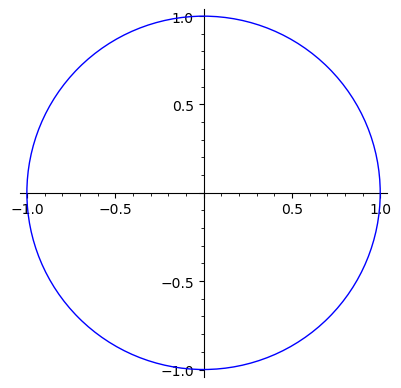

In [ ]:
unitcircle = circle((0, 0), 1)
unitcircle.show()

Let us pick the random point at distance 1/2 of the center, defined by some random angle.

In [ ]:
angle = RR(pi)*RR.random_element()
rpt = (0.5*cos(angle), 0.5*sin(angle))
rpt

(0.482192224737109, -0.132252252922502)

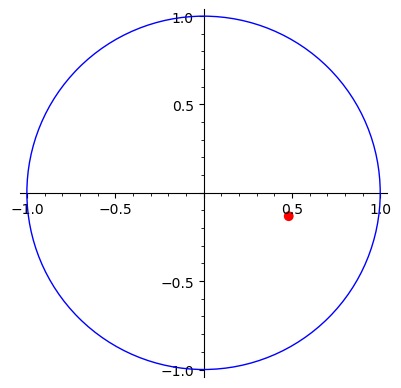

In [ ]:
ppt = point(rpt, color='red', size=50)
(unitcircle+ppt).show()

What is now the radius of the circle which has the random point as center and that touches the unit circle?

Let us try 1/2, as 1/2 is 1 - 1/2.

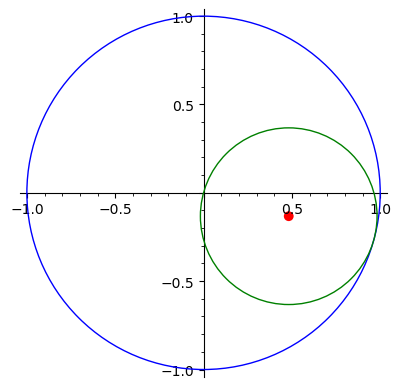

In [ ]:
tc1 = circle(rpt, 1/2, color='green')
(unitcircle+ppt + tc1).show()

There is another, larger touching circle with radius 3/2 = 1 + 1/2.

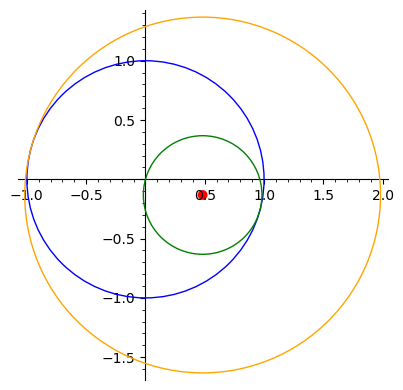

In [ ]:
tc2 = circle(rpt, 3/2, color='orange')
(unitcircle+ppt + tc1 + tc2).show()

The first touching circle ``tc1`` has radius 1/2 and 
the 3/2 is the radius of the second touching circle ``tc2``.
Their equations can be summarized by

$$
    (x - c_x)^2 + (y - c_y)^2 - (1 \pm 1/2)^2 = 0,
$$

where $(c_x, c_y)$ is the center of the circle.

**2. The Problem of Apollonius**

With one given circle, we can fix one parameter of the touching circle, as we did in the example, we picked the two coordinates of the center and then determined the radius of the touching circle.  With one given circle, this problem has two degrees of freedom.  To fix two two degrees, we can give two more circles on input.

Here is then the Problem of Apollonius: *Given three circles, compute all circles that touch all three circles.*

The input is determined by 9 numbers, two coordinates for each center and one radius for each circle.

In [ ]:
(c1x, c1y, r1) = (0, 0, 1)
(c2x, c2y, r2) = (2, 0, 2/3)
(c3x, c3y, r3) = (1, 1, 1/3)

In plotting the input, we transition to the ``implicit_plot`` because we will need the equations for solving.

In [ ]:
x, y = var('x, y')
c1 = (x-c1x)^2 + (y-c1y)^2 - r1^2
c2 = (x-c2x)^2 + (y-c2y)^2 - r2^2
c3 = (x-c3x)^2 + (y-c3y)^2 - r3^2

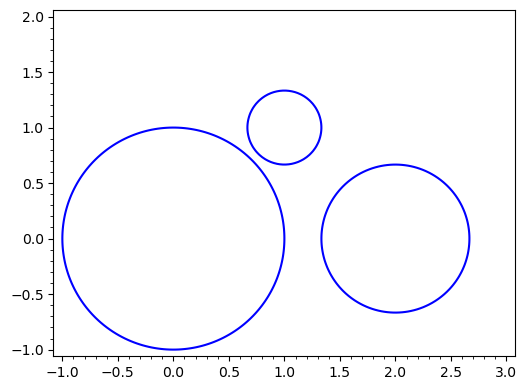

In [ ]:
xr = (x, -1, 3); yr = (y, -1, 2)
p1 = implicit_plot(c1, xr, yr)
p2 = implicit_plot(c2, xr, yr)
p3 = implicit_plot(c3, xr, yr)
(p1 + p2 + p3).show()

The circle tangent to all three circles satisfies the following equations.

In [ ]:
r = var('r')
e1 = (x - c1x)^2 + (y - c1y)^2 - (r - r1)^2
e2 = (x - c2x)^2 + (y - c2y)^2 - (r - r2)^2
e3 = (x - c3x)^2 + (y - c3y)^2 - (r - r3)^2
eqs = [e1, e2, e3]
eqs

[-(r - 1)^2 + x^2 + y^2,
 -1/9*(3*r - 2)^2 + (x - 2)^2 + y^2,
 -1/9*(3*r - 1)^2 + (x - 1)^2 + (y - 1)^2]

In [ ]:
sols = solve(eqs, (x, y, r), solution_dict=True)
sols

[{x: 7/468*sqrt(170) + 77/78,
  y: 7/156*sqrt(85)*sqrt(2) - 35/234,
  r: -1/936*sqrt(-90720*sqrt(170) + 1491120) + 1/3},
 {x: -7/468*sqrt(170) + 77/78,
  y: -7/156*sqrt(85)*sqrt(2) - 35/234,
  r: 1/78*sqrt(5)*sqrt(126*sqrt(170) + 2071) + 1/3}]

There are two solutions, let us plot them.

7/468*sqrt(170) + 77/78 7/156*sqrt(85)*sqrt(2) - 35/234 -1/936*sqrt(-90720*sqrt(170) + 1491120) + 1/3
-7/468*sqrt(170) + 77/78 -7/156*sqrt(85)*sqrt(2) - 35/234 1/78*sqrt(5)*sqrt(126*sqrt(170) + 2071) + 1/3


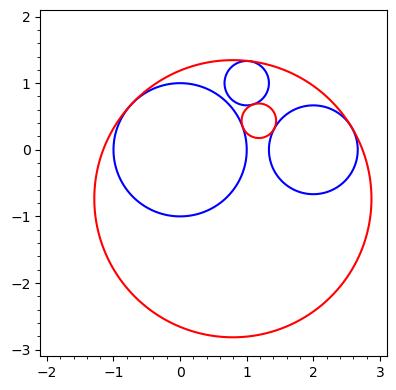

In [ ]:
s0x = sols[0][x]
s0y = sols[0][y]
s0r = sols[0][r]
print(s0x, s0y, s0r)
sc0 = implicit_plot((x-s0x)^2 + (y-s0y)^2 - s0r^2, (x, -2, 3), (y, -3, 2), color='red')
s1x = sols[1][x]
s1y = sols[1][y]
s1r = sols[1][r]
print(s1x, s1y, s1r)
sc1 = implicit_plot((x-s1x)^2 + (y-s1y)^2 - s1r^2, (x, -2, 3), (y, -3, 2), color='red')
(p1 + p2 + p3 + sc0 + sc1).show()

There are three more pairs of solutions, obtained by changing ``r-r1`` into ``r+r1`` for the first pair, ``r-r2`` into ``r+r2`` for the second pair, and ``r-r3`` into ``r+r3`` for the third pair.  Computing and visualizing the solutions is left as an exercise.

**3. Groebner Bases**

A Groebner basis for a system of polynomials in lexicographic term order can be viewed as a generalization of the row reduced echelon form for linear systems.  Let us cast the equations from above into a polynomial ring with rational coefficients and a lexicographic term order.

In [ ]:
eqs

[-(r - 1)^2 + x^2 + y^2,
 -1/9*(3*r - 2)^2 + (x - 2)^2 + y^2,
 -1/9*(3*r - 1)^2 + (x - 1)^2 + (y - 1)^2]

In [ ]:
P.<x, y, r> = PolynomialRing(QQ, order='lex')
P

Multivariate Polynomial Ring in x, y, r over Rational Field

In [ ]:
Q = [P(e) for e in eqs]

In [ ]:
type(Q[0])

<class 'sage.rings.polynomial.multi_polynomial_libsingular.MPolynomial_libsingular'>

In order to define a Groebner basis, we have to declare an ideal, generated by the polynomials in Q.

In [ ]:
J = Ideal(Q)
J

Ideal (x^2 + y^2 - r^2 + 2*r - 1, x^2 - 4*x + y^2 - r^2 + 4/3*r + 32/9, x^2 - 2*x + y^2 - 2*y - r^2 + 2/3*r + 17/9) of Multivariate Polynomial Ring in x, y, r over Rational Field

In [ ]:
G = J.groebner_basis()
show(G)

[x + 1/6*r - 41/36, y + 1/2*r - 11/36, r^2 - 71/39*r - 253/468]

Observe the nice structure of ``G``.  The last equation is quadratic in one variable ``r``.  Once we have the two values for ``r``, we can write the coordinates for ``x`` and ``y``.

The symbolic-numeric manner to solve the system is over ``QQbar``.

In [ ]:
J.variety(QQbar)

[{r: -0.2598568419594498?, y: 0.4354839765352805?, x: 1.182198362548798?},
 {r: 2.080369662472271?, y: -0.7346292756805796?, x: 0.7921606118101772?}]

The coordinate values of the solutions are intervals.

### Lec30

In Lecture 30 of MCS 320, we do linear algebra.

**1. Systems of Linear Equations**

Let us define a random 3-by-3 system over the rational numbers, with numerators and denominators bounded by 100.

In [ ]:
A = random_matrix(QQ, 3, num_bound=100, den_bound=100)
A

[  -5/4 -57/79  13/25]
[-11/84 -37/31 -34/93]
[ -11/9     46  -1/18]

The matrix A is the coefficient matrix of our random linear system.  The right hand side vector is random vector with the same bounds.

In [ ]:
b = random_vector(QQ, 3, num_bound=100, den_bound=100)
b

(-22/43, -87/41, -62/27)

The backslash operator (not to confuse with the division operator) is a convenient operator to solve the linear system defined by the coefficient matrix ``A`` and the right hand side vector ``b``.

In [ ]:
x = A\b
x

(5005572229574/2065559623287, 252208486789/12393357739722, 3352882185150/688519874429)

The residual vector is the difference between ``b`` and the product of ``A`` with the solution ``x``.

In [ ]:
r = b - A*x
r

(0, 0, 0)

We solved a random system over the rational numbers.  Observe the expression swell in the numbers of the solution ``x``.  We started out with numbers not longer than two decimal places and ended with numbers of more than six decimal places.  And that only for 3-dimensional problems.

We can define matrices via a formula.  For example, the $(i,j)$-th element of the Hilbert matrix is $1/(i+j)$ for $i$ and $j$ starting at 1.

In [ ]:
h = lambda i,j: 1/((i+1)+(j+1))

In [ ]:
H = Matrix(QQ, 4, 4, h)

In [ ]:
H

[1/2 1/3 1/4 1/5]
[1/3 1/4 1/5 1/6]
[1/4 1/5 1/6 1/7]
[1/5 1/6 1/7 1/8]

**2. Matrix Factorizations**

The four important matrix factorizations are

1. The LU factorization.

2. The QR factorization.

3. The Eigenvalue Decomposition.

4. The Singular Value Decomposition.

We work on the random 3-dimensional matrix ``A`` from above to illustrate those four factorizations.

> 2.1 the LU factorization

In [ ]:
P, L, U = A.LU()

In [ ]:
P

[1 0 0]
[0 0 1]
[0 1 0]

In [ ]:
L

[              1               0               0]
[          44/45               1               0]
[         11/105 -143739/6005041               1]

In [ ]:
U

[                -5/4               -57/79                13/25]
[                   0           55346/1185             -141/250]
[                   0                    0 -390538783/900756150]

In [ ]:
P*A

[  -5/4 -57/79  13/25]
[ -11/9     46  -1/18]
[-11/84 -37/31 -34/93]

In [ ]:
L*U

[  -5/4 -57/79  13/25]
[ -11/9     46  -1/18]
[-11/84 -37/31 -34/93]

> 2.2 the QR decomposition

For the QR decomposition, we must convert the matrix.

In [ ]:
A.rows()

[(-5/4, -57/79, 13/25), (-11/84, -37/31, -34/93), (-11/9, 46, -1/18)]

In [ ]:
nbrs = [[CDF(n) for n in row] for row in A.rows()]
nbrs

[[-1.25, -0.7215189873417721, 0.52],
 [-0.13095238095238096, -1.1935483870967742, -0.3655913978494624],
 [-1.2222222222222223, 46.0, -0.05555555555555555]]

In [ ]:
C = Matrix(CDF, nbrs)
C

[               -1.25  -0.7215189873417721                 0.52]
[-0.13095238095238096  -1.1935483870967742  -0.3655913978494624]
[ -1.2222222222222223                 46.0 -0.05555555555555555]

In [ ]:
Q, R = C.QR()

In [ ]:
Q*Q.transpose()

[    1.0000000000000004  5.551115123125783e-17 1.8648277366750676e-16]
[ 5.551115123125783e-17     1.0000000000000002 -7.632783294297951e-17]
[1.8648277366750676e-16 -7.632783294297951e-17                    1.0]

In [ ]:
R

[    1.75313310577689   -31.46596530702512  -0.3047251230768725]
[                 0.0    33.58330202196513  -0.3597878656704642]
[                 0.0                  0.0 -0.42992880924251553]

In [ ]:
Q*R

[ -1.2500000000000002    -0.72151898734176   0.5200000000000001]
[-0.13095238095238096    -1.19354838709677  -0.3655913978494625]
[ -1.2222222222222223                 46.0 -0.05555555555555543]

In [ ]:
C

[               -1.25  -0.7215189873417721                 0.52]
[-0.13095238095238096  -1.1935483870967742  -0.3655913978494624]
[ -1.2222222222222223                 46.0 -0.05555555555555555]

> 2.3 the Eigenvalue Decomposition

In [ ]:
L = A.eigenvalues()
L

[-1.449367248669314?, -0.524868346991509? - 4.145964620413456?*I, -0.524868346991509? + 4.145964620413456?*I]

The eigenvalue problem is equivalent to finding the roots of the characteristic polynomial and for this, the transition to algebraic numbers happens automatically.

In [ ]:
D, V = A.right_eigenmatrix()

In [ ]:
show(D)

[                       -1.449367248669314?                                          0                                          0]
[                                         0 -0.524868346991509? - 4.145964620413456?*I                                          0]
[                                         0                                          0 -0.524868346991509? + 4.145964620413456?*I]

In [ ]:
show(V)

[                                           1                                            1                                            1]
[                        0.03664640772965092? -0.691282990049901? + 0.04152266990464062?*I -0.691282990049901? - 0.04152266990464062?*I]
[                        -0.3325503262971190?   0.4353035578097981? - 7.915394664754103?*I   0.4353035578097981? + 7.915394664754103?*I]

In [ ]:
show(V*D)

[                       -1.449367248669314? -0.524868346991509? - 4.145964620413456?*I -0.524868346991509? + 4.145964620413456?*I]
[                     -0.05311410314473801? 0.5349840806605853? + 2.844240884324994?*I 0.5349840806605853? - 2.844240884324994?*I]
[                       0.4819875514693377? -33.04542329550710? + 2.349786963655363?*I -33.04542329550710? - 2.349786963655363?*I]

In [ ]:
show(A*V)

[                       -1.449367248669314? -0.524868346991509? - 4.145964620413456?*I -0.524868346991509? + 4.145964620413456?*I]
[                     -0.05311410314473801? 0.5349840806605853? + 2.844240884324994?*I 0.5349840806605853? - 2.844240884324994?*I]
[                       0.4819875514693377? -33.04542329550710? + 2.349786963655363?*I -33.04542329550710? - 2.349786963655363?*I]

We see that $V D = A V$ or equivalently: $D = V^{-1} A V$, or $A = V D V^{-1}$.

> 2.4 Singular Value Decomposition

To compute the Singular Value Decompsition, we must again use the matrix of ``CDF`` type, and work over the complex double field.

In [ ]:
U, S, V = C.SVD()

Both ``U`` and ``V`` are orthogonal matrices, that is: their transpose is the inverse matrix.

In [ ]:
U*U.transpose()

[     1.0000000000000002   1.700029006457271e-16  1.7580338226852454e-16]
[  1.700029006457271e-16      1.0000000000000002 -2.0469737016526324e-16]
[ 1.7580338226852454e-16 -2.0469737016526324e-16                     1.0]

In [ ]:
V*V.transpose()

[     0.9999999999999991 -2.2551405187698492e-17   5.551115123125783e-17]
[-2.2551405187698492e-17                     1.0                     0.0]
[  5.551115123125783e-17                     0.0      0.9999999999999996]

In [ ]:
S

[46.036789227343746                0.0                0.0]
[               0.0 1.3707314283740828                0.0]
[               0.0                0.0 0.4011228818407111]

In [ ]:
U.transpose()*C*V

[      46.03678922734373   4.163336342344337e-17 -2.0816681711721685e-16]
[   8.35909032964599e-15       1.370731428374083 -3.3306690738754696e-16]
[  1.710491557421756e-15  2.7755575615628914e-17     0.40112288184071115]

**3. Matrices over Rings**

The Hermite normal form is computed with a unimodular matrix.  We make a random integer matrix with numbers that are 3 decimal places long, that is: in the range 100 and 999.

In [ ]:
A = random_matrix(ZZ, 3, x=100, y=999)
A

[503 842 787]
[599 828 414]
[857 948 500]

In [ ]:
H, U = A.hermite_form(transformation=True)
H

[       1        0  5995442]
[       0        2 12585079]
[       0        0 27081514]

In [ ]:
U

[  15690  -27092    9727]
[  32935  -56869   20418]
[  70872 -122375   43937]

In [ ]:
U*A

[       1        0  5995442]
[       0        2 12585079]
[       0        0 27081514]

Not all integer matrices are invertible, but unimodular matrices are those with inverses with integer coefficients.

In [ ]:
D, U, V = A.smith_form()

In [ ]:
D

[       1        0        0]
[       0        1        0]
[       0        0 54163028]

In [ ]:
U*A*V

[       1        0        0]
[       0        1        0]
[       0        0 54163028]

**4. Resultants**

The resultant is the determinant of the Sylvester matrix, used to eliminate variables in polynomial systems.

In [ ]:
P.<x,y> = PolynomialRing(QQ)
p = P.random_element(degree=2, terms=5)
q = P.random_element(degree=2, terms=5)
(p, q)

(-1/2*x^2 + 2*x*y + 1/2*y^2 + 1/3*x, 5*y^2 - 3*x + y - 3)

The resultant of the system defined by ``p`` and ``q`` with respect to ``x`` is the condition on ``y`` for the system to have solutions.

In [ ]:
p.resultant(q,x)

-25/2*y^4 + 25*y^3 + 30*y^2 - 14*y - 15/2

In [ ]:
q.resultant(p,x)

-25/2*y^4 + 25*y^3 + 30*y^2 - 14*y - 15/2

In [ ]:
S = q.sylvester_matrix(p, x)
S

[           -3 5*y^2 + y - 3             0]
[            0            -3 5*y^2 + y - 3]
[         -1/2     2*y + 1/3       1/2*y^2]

In [ ]:
det(S)

-25/2*y^4 + 25*y^3 + 30*y^2 - 14*y - 15/2

Computing the roots of this polynomial will give all y-coordinates of the solutions.

### Lec31

In Lecture 31 of MCS 320, we study differential equations, using the pendulum problem as the running example.

**1. The Pendulum**

A first model of the pendulum is a second order equation

$$
    L \frac{d^2}{d~\!t} \theta(t) = -g \theta(t),
$$

where $L$ is the length of the string and $g$ the gravitational constant,

subject to initial conditions

$$
    \theta(0) = \pi/10, \theta'(0) = 0.
$$

In [ ]:
t = var('t')

In [ ]:
theta = function('theta')(t)

In [ ]:
g, L = var('g, L', domain='positive')

We have to assume that both ``g`` and ``L`` are positive, otherwise the symbolic solver will not work.

In [ ]:
ode = L*diff(theta, t, 2) == - g*theta
show(ode)

L*diff(theta(t), t, t) == -g*theta(t)

In [ ]:
sol = desolve(ode, theta, ivar=t)
sol

_K2*cos(sqrt(g)*t/sqrt(L)) + _K1*sin(sqrt(g)*t/sqrt(L))

As this is a second order equation, we have two families of solutions, with parameters ``_K1`` and ``_K2``.  When we specify the two initial conditions, we obtain a unique solution.

In [ ]:
sol = desolve(ode, theta, ivar=t, ics=[0, pi/10, 0])
sol

1/10*pi*cos(sqrt(g)*t/sqrt(L))

Let us look at a particular instance for the symbolic parameters.

In [ ]:
ft = sol(g=10, L=3)
ft

1/10*pi*cos(1/3*sqrt(10)*sqrt(3)*t)

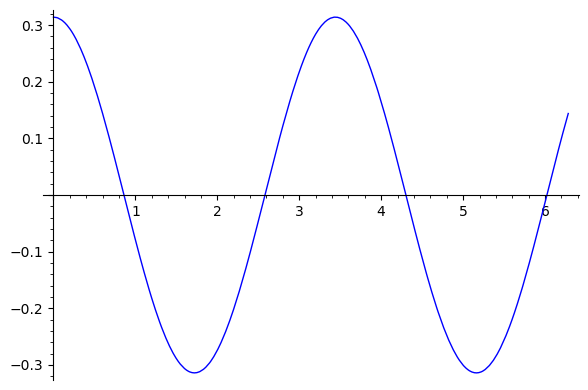

In [ ]:
plot(ft, (t, 0, 2*pi))

Observe that the 0.3 corresponds to the $\pi/10$.

In [ ]:
sin(RR(pi)/10)

0.309016994374947

In [ ]:
RR(pi)/10

0.314159265358979

**2. Solving with Laplace transforms**

The short, direct way to solve this problem with Laplace transforms is as follows:

In [ ]:
sol = desolve_laplace(ode, theta, ivar=t)
sol

(L^2*sin(sqrt(L*g)*t/L)*D[0](theta)(0)/sqrt(L*g) + L*cos(sqrt(L*g)*t/L)*theta(0))/L

In [ ]:
init = {theta(t=0): pi/10, diff(theta,t).subs({t:0}): 0}
init

{theta(0): 1/10*pi, D[0](theta)(0): 0}

In [ ]:
sol.subs(init)

1/10*pi*cos(sqrt(L*g)*t/L)

It is instructive to look at the long way to use Laplace transforms.

In [ ]:
s = var('s')
Lode = ode.laplace('t', 's')
Lode

(s^2*laplace(theta(t), t, s) - s*theta(0) - D[0](theta)(0))*L == -g*laplace(theta(t), t, s)

In [ ]:
T = var('T')
Teq = Lode.subs({laplace(theta,t,s): T})
Teq

(T*s^2 - s*theta(0) - D[0](theta)(0))*L == -T*g

In [ ]:
sol = solve(Teq, T)
sol

[T == (L*s*theta(0) + L*D[0](theta)(0))/(L*s^2 + g)]

In [ ]:
Ts = sol[0].rhs().subs(init)
Ts

1/10*pi*L*s/(L*s^2 + g)

In [ ]:
ft = inverse_laplace(Ts, s, t)
ft

1/10*pi*cos(sqrt(L*g)*t/L)

**3. Plotting the Slope Field**

The slope field shows the velocities.

In [ ]:
one = ft(g=10, L=1)
one

1/10*pi*cos(sqrt(10)*t)

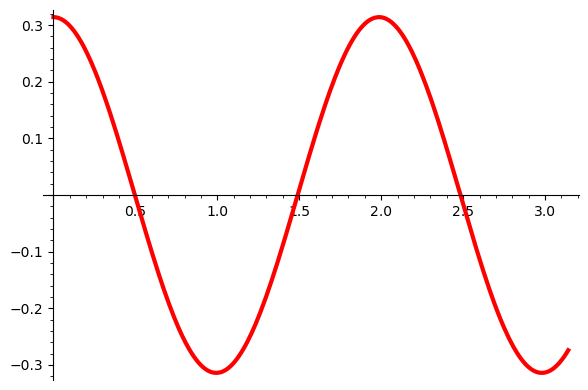

In [ ]:
oneplot = plot(one, (t, 0, pi), color='red', thickness=3)
oneplot.show()

In [ ]:
v = var('v')

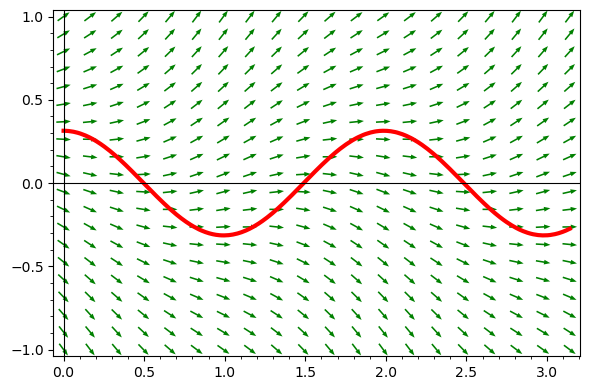

In [ ]:
slopes = plot_slope_field(v-one, (t, 0, pi), (v, -1, 1),
                          headlength=4, headaxislength=4, color='green')
(oneplot+slopes).show()

In [ ]:
dtone = diff(one, t)
dtone

-1/10*sqrt(10)*pi*sin(sqrt(10)*t)

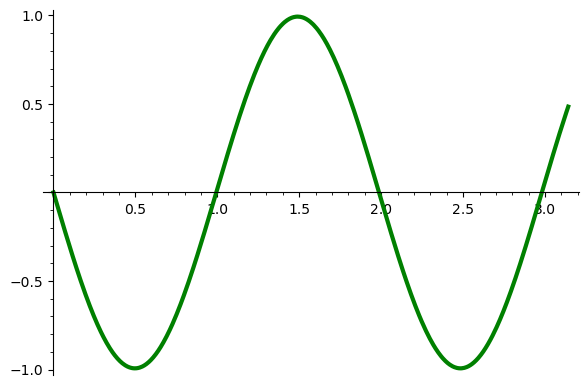

In [ ]:
dtoneplot = plot(dtone, (t, 0, pi), color='green', thickness=3)
dtoneplot.show()

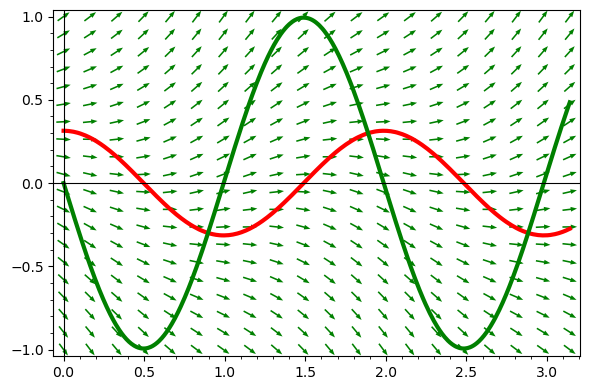

In [ ]:
slopefield = oneplot+dtoneplot+slopes
slopefield.show()

**4. The Pendulum with Damping**

Set $g/L = 10$ and assume the damping constant to be 1.2.  The damping is proportional to the velocity.

$$
    \frac{d^2}{d~\!t^2} \theta(t) = - 1.2 \frac{d}{d~\!t} \theta(t) - 10 \sin(\theta(t)).
$$

To turn this is into a system of first order differential equations, we introduce

$$
    \frac{d}{d~\!t} \theta(t) = v(t)
$$

and obtain

$$
    \frac{d}{d~\!t} v(t) = - 1.2 v(t) - 10 \sin(\theta(t))
$$

In [ ]:
theta, v = var('theta, v')
rhs = [v, -1.2*v - 10*sin(theta)]
rhs

[v, -1.20000000000000*v - 10*sin(theta)]

In [ ]:
initc = [RR(pi)/10, 0.0]
initc

[0.314159265358979, 0.000000000000000]

In [ ]:
endtime = 2*RR(pi)
step = 0.1
trange = srange(0, endtime, step)

In [ ]:
sol = desolve_odeint(rhs,initc,trange,[theta,v])

In [ ]:
angles = sol[:, 0]
pts = [(x, y) for (x, y) in zip(trange, angles)]

In [ ]:
p = line(pts)

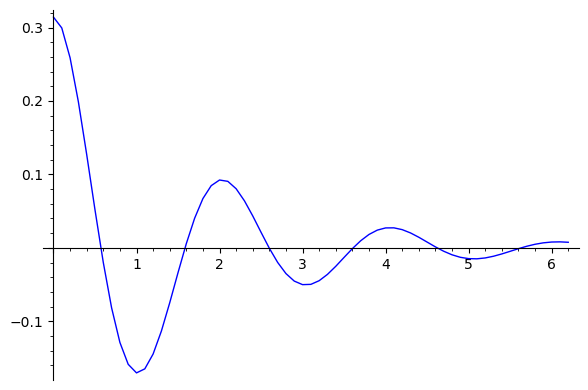

In [ ]:
p.show()

### Lec32

In Lecture 32 of MCS 320, we consider polyhedral and unconstrained optimization.

**1. Polyhedra**

Every polyhedron can be defined in two ways:

1. As the convex hull of a list of points.

2. As the intersection of half spaces.

Let us generate 10 random points with integer coordinates between 10 and 99.

In [ ]:
set_random_seed(20220722)

In [ ]:
xvals = [ZZ.random_element(x=10, y=99) for _ in range(10)]
xvals

In [ ]:
yvals = [ZZ.random_element(x=10, y=99) for _ in range(10)]
yvals

In [ ]:
pts = [[x, y] for (x,y) in zip(xvals,yvals)]
pts

In [ ]:
P = Polyhedron(vertices=pts)
P.plot()

In [ ]:
P.Vrepresentation()

In [ ]:
P.Hrepresentation()

**2. Linear Programming**

Linear programming deals with optimizing linear functions
subject to linear constraints.  We consider an example of the documentation.

In [ ]:
p = MixedIntegerLinearProgram(maximization=True)
x = p.new_variable(nonnegative=True)
p.set_objective(x[1] + 5*x[2])
p.add_constraint(x[1] + 0.2*x[2], max=4)
p.add_constraint(1.5*x[1] + 3*x[2], max=4)
p.solve()

What is returned is the value of the objective function.  To see the values of the coordinates at the optimal solution, we do the following.

In [ ]:
p.get_values(x)

This problem can be solved interactively, in a step by step fashion.

We first convert the problem to its standard form.

In [ ]:
A = ([1, 0.2], [1.5, 3])
b = (4, 4)
c = (1, 5)
P = InteractiveLPProblem(A, b, c, ["x1", "x2"], problem_type="max", constraint_type="<=", variable_type=">=")
P.plot().show(figsize=5)

In [ ]:
F = P.standard_form()
F

In [ ]:
%display typeset
F

In [ ]:
%display typeset
F.run_simplex_method()

We can also run the simplex method step-by-step.

In [ ]:
D = F.initial_dictionary()
show(D)

We ask for the solution, whether the solution is optional,
and the value of the objective function.

In [ ]:
D.basic_solution()

In [ ]:
D.is_optimal()

In [ ]:
D.objective_value()

The simplex algorithm consists in swapping variables.
Variables in the basis are swapped with variables not in the basis.
We can ask for the possible variables which can enter the basis.

In [ ]:
D.basic_variables()

In [ ]:
D.nonbasic_variables()

In [ ]:
etr = D.possible_entering()
etr

We select the first of the possible entering variables.
After setting the entering variable, we ask for the possible variables
which can leave the basis.

In [ ]:
D.enter(etr[0])
lev = D.possible_leaving()
lev

We select the leaving variable and update the dictionary.

In [ ]:
D.leave(lev[0])
D.update()
show(D)

Should we continue?  Let us check if the dictionary is optimal
and what the objective value is.

In [ ]:
D.is_optimal()

In [ ]:
D.objective_value()

To continue, let us ask for the possible variables which may enter.

In [ ]:
etr = D.possible_entering()
etr

After selecting the entering variable,
we ask for the possible variables which may leave.

In [ ]:
D.enter(etr[0])
lev = D.possible_leaving()
lev

After selecting the leaving variable, we update the basis.

In [ ]:
D.leave(lev[0])
D.update()
show(D)

Then we check again for optimality.

In [ ]:
D.is_optimal()

In [ ]:
D.objective_value()

**3. Unconstrained Minimization**

To introduce minimization without constraints, we take a sum of squares function.

In [ ]:
x, y = var('x,y')
f(x,y) = (3+x-y^2)^2 + (x - 1)^2 + (y - 1)^2
pf = plot3d(f(x,y), (x, -2, 3), (y, -2, 3), adaptive=True, color='automatic',opacity=0.5, aspect_ratio=[5,5,1])
pf.show(figsize=3)

We can look for a minimum.  We need to give an initial guess.

In [ ]:
p = minimize(f, x0=[0.0, 0.0], verbose=True)
print('minimum at', p, 'with value', f(p[0], p[1]))

In [ ]:
pt = point((p[0], p[1], f(p[0],p[1])), size=500, color='black')
(pt+pf).show(figsize=4)

Even though this problem was defined to be straighforward, observe that the optimum lies in a valley.

### Lec33

We introduce interacts to give the user control over plots.

**1. Making Plot with a Parameter**

Code adapted from Sage for Undergraduates by Gregory Bard,
pages 285 in Figure 1.

Consider the tangent line to $y = f(x)$ at the point $x_0$.  We can make the plot where $x_0$ is a parameter.

In [ ]:
f(x) = x^3 - x
f

x |--> x^3 - x

In [ ]:
df(x) = diff(f(x), x)
df

x |--> 3*x^2 - 1

In [ ]:
def tangent_at_point(x0):
    """
    Shows the tangent line at the point x0,
    using f and its derivative as global variables.
    """
    y0 = f(x0)
    slope = df(x0)
    # y - y0 = slope*(x - x0) implies
    # y = slope*x - slope*x0 + y0
    b = y0 - slope*x0
    P1 = plot(f, -2, 2, color='blue', ymin=-6, ymax=6, gridlines='minor')
    P2 = plot(slope*x + b, -2, 2, color='tan', ymin=-6, ymax=6)
    P3 = point((x0, y0), color='red', size=50)
    P = P1+P2+P3
    P.show(figsize=3)

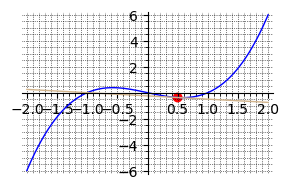

In [ ]:
tangent_at_point(0.5)

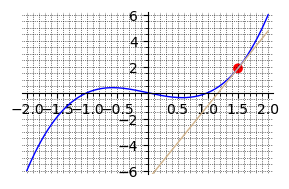

In [ ]:
tangent_at_point(1.5)

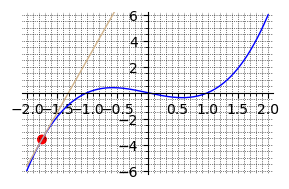

In [ ]:
tangent_at_point(-1.75)

**2. Adding a Slider**

Code adapted from Sage for Undergraduates by Gregory Bard,
pages 285 in Figure 1.

In [ ]:
@interact
def tangent_at_point(x0 = slider(-2, 2, 0.1, -1.5, label='x-coordinate')):
    """
    Shows the tangent line at the point x0,
    using f and its derivative as global variables.
    """
    y0 = f(x0)
    slope = df(x0)
    # y - y0 = slope*(x - x0) implies
    # y = slope*x - slope*x0 + y0
    b = y0 - slope*x0
    P1 = plot(f, -2, 2, color='blue', ymin=-6, ymax=6, gridlines='minor')
    P2 = plot(slope*x + b, -2, 2, color='tan', ymin=-6, ymax=6)
    P3 = point((x0, y0), color='red', size=50)
    P = P1+P2+P3
    P.show(figsize=4)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


**3. Adding a Selector**

We can add a selector, for example in a color plot.

In [ ]:
# reset()
fun = x^3 - x
rng = (x, -2, 2)
@interact
def colorplot(colrgb=selector(['red', 'green', 'blue'], label='color: ')):
    """
    Plots the expression defined by fun over the range in rng.
    The parameters fun and rng must be defined before calling colorplot.
    The user can select the color.
    """
    P = plot(fun, rng, color=colrgb)
    P.show(figsize=4)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


### Lec34

We demonstrate an application of an interact.

**The Chebyshev Four Bar Mechanism**

The Chebyshev mechanism translates circular motion into linear motion, and vice versa.

**1. The Crank**

We will make a interactive web page to model a four bar mechanism.
The mechanism is attributed to Chebyshev and transmits straight to circular motion.
Let us first start with the making of an interact for a crank.

In [ ]:
@interact
def show_crank(angle = slider(0, 2*pi, pi/20, pi/10, label='angle')):
    """
    Shows the drawing of a crank, where the user can slide the angle
    to turn the crank.
    """
    center = (0,0)
    endpnt = (cos(angle), sin(angle))
    pltcnt = point(center, size=50)
    pltend = point(endpnt, size=50)
    crank = line([center, endpnt])
    (pltcnt+crank+pltend).show(xmin=-1, xmax=1, ymin=-1, ymax=+1, figsize=3)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


Notice that the `aspect_ratio = 1` is missing.  But it is good enough as a start.

**2. The Connector Coordinates**

There is a bar connected to the end point of the crank.
The end point of that bar is connected to another bar, of length 5/2,
that originates at (2,0).
To find the coordinates of the connector point, we intersect two circles.

In [ ]:
PR.<x,y,c,s> = PolynomialRing(QQ, order='lex')
p = (x-c)^2 + (y-s)^2 - (5/2)^2
q = (x-2)^2 + y^2 - (5/2)^2
(p, q)

(x^2 - 2*x*c + y^2 - 2*y*s + c^2 + s^2 - 25/4, x^2 - 4*x + y^2 - 9/4)

With the resultant we get symbolic values for the coordinates,
in function of the end point coordinates (c, s) of the crank.

In [ ]:
ry = p.resultant(q,x)
ry

4*y^2*c^2 - 16*y^2*c + 4*y^2*s^2 + 16*y^2 - 4*y*c^2*s + 16*y*c*s - 4*y*s^3 - 16*y*s + c^4 - 8*c^3 + 2*c^2*s^2 - c^2 - 8*c*s^2 + 68*c + s^4 + 8*s^2 - 84

In [ ]:
rx = p.resultant(q,y)
rx

4*x^2*c^2 - 16*x^2*c + 4*x^2*s^2 + 16*x^2 - 4*x*c^3 + 8*x*c^2 - 4*x*c*s^2 + 16*x*c - 8*x*s^2 - 32*x + c^4 + 2*c^2*s^2 - 8*c^2 + s^4 - 17*s^2 + 16

To solve the polynomials for x and y, we must convert back to the Symbolic Ring (SR).

In [ ]:
x, y, c, s = var('x,y,c,s')
sx = solve(SR(rx),x)
sx

[x == 1/2*(c^3 + (c + 2)*s^2 - 2*c^2 - sqrt(-c^4 - s^4 + 8*c^3 - (2*c^2 - 8*c - 17)*s^2 + c^2 - 68*c + 84)*s - 4*c + 8)/(c^2 + s^2 - 4*c + 4), x == 1/2*(c^3 + (c + 2)*s^2 - 2*c^2 + sqrt(-c^4 - s^4 + 8*c^3 - (2*c^2 - 8*c - 17)*s^2 + c^2 - 68*c + 84)*s - 4*c + 8)/(c^2 + s^2 - 4*c + 4)]

In [ ]:
sy = solve(SR(ry),y)
sy

[y == 1/2*(s^3 + (c^2 - 4*c + 4)*s - sqrt(-c^4 - s^4 + 8*c^3 - (2*c^2 - 8*c - 17)*s^2 + c^2 - 68*c + 84)*(c - 2))/(c^2 + s^2 - 4*c + 4), y == 1/2*(s^3 + (c^2 - 4*c + 4)*s + sqrt(-c^4 - s^4 + 8*c^3 - (2*c^2 - 8*c - 17)*s^2 + c^2 - 68*c + 84)*(c - 2))/(c^2 + s^2 - 4*c + 4)]

We take the second solution as coordinates for x 
and the first solution for the coordinates for y.

In [ ]:
xv = sx[1].rhs()
xv

1/2*(c^3 + (c + 2)*s^2 - 2*c^2 + sqrt(-c^4 - s^4 + 8*c^3 - (2*c^2 - 8*c - 17)*s^2 + c^2 - 68*c + 84)*s - 4*c + 8)/(c^2 + s^2 - 4*c + 4)

In [ ]:
yv = sy[0].rhs()
yv

1/2*(s^3 + (c^2 - 4*c + 4)*s - sqrt(-c^4 - s^4 + 8*c^3 - (2*c^2 - 8*c - 17)*s^2 + c^2 - 68*c + 84)*(c - 2))/(c^2 + s^2 - 4*c + 4)

**3. Crank and Connector**

Now that we have the symbolic coordinates of the connector, we can extend the interact for the crank showing the connector.

In [ ]:
fx(cs, sn) = xv.subs(c=cs, s=sn)
fy(cs, sn) = yv.subs(c=cs, s=sn)
@interact
def connector(angle = slider(0, 2*pi, pi/20, 7*pi/20, label='angle')):
    """
    Shows the drawing of a crank, where the user can slide the angle
    to turn the crank.  Also the connector point is drawn.
    """
    center = (0,0)
    c = cos(angle)
    s = sin(angle)
    endpnt = (c, s)
    (x, y) = (fx(c,s), fy(c,s))
    pltcnt = point(center, size=50)
    pltend = point(endpnt, size=50)
    connector = point((x,y), size=50)
    crank = line([center, endpnt])
    bartwobase = point((2,0),size=50)
    bartwo = line([(2,0), (x,y)], color='red')
    barthree = line([endpnt, (x,y)], color='green')
    bars = crank + bartwo + barthree
    pnts = pltcnt + connector + pltend + bartwobase
    plt = bars + pnts 
    plt.show(xmin=-1, xmax=3, ymin=-1, ymax=+3, figsize=5)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


**4. The Coupler**

The final addition is the coupler point and the fourth bar.

In [ ]:
@interact
def coupler(angle = slider(0, 2*pi, pi/20, 7*pi/20, label='angle')):
    """
    Shows the drawing of a crank, where the user can slide the angle
    to turn the crank.  Also the connector point is drawn,
    with the coupler point and fourth bar.
    """
    center = (0,0)
    c = cos(angle)
    s = sin(angle)
    endpnt = (c, s)
    (x, y) = (fx(c,s), fy(c,s))
    dx = x - c
    dy = y - s
    xx = x + dx
    yy = y + dy
    pltcnt = point(center, size=50)
    pltend = point(endpnt, size=50)
    connector = point((x,y), size=50)
    coupler = point((xx,yy), size=50, color='red')
    crank = line([center, endpnt])
    bartwobase = point((2,0),size=50)
    bartwo = line([(2,0), (x,y)], color='red')
    barthree = line([endpnt, (x,y)], color='green')
    barfour = line([(x,y), (xx,yy)], color='blue')
    bars = crank + bartwo + barthree + barfour
    pnts = pltcnt + connector + pltend + bartwobase + coupler
    plt = bars + pnts 
    plt.show(xmin=-1, xmax=5, ymin=-1, ymax=+5, figsize=5)

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


**5. Extensions**

Several extensions will make this interact even more interesting, below are two suggestions:

1. Draw *the coupler curve*, this is the curve traced by the coupler point.

2. Add addition sliders to control the parameters of the mechanism, one slider to control the length of each bar.

### Lec39

We use of SymPy in SageMath.

**1. Series Expansions**

If we use sympy in SageMath, then we may have to be explicit about the use of its functions.
For example, the ``sqrt()`` function in SageMath is different from ``the sqrt()`` function in sympy.
Consider the generating function for the Catalan numbers ``(1 - sqrt(4-x**2))/(2*x)``.
With sympy we can define a generator for the terms in a Taylor series,
but we must use the ``sqrt()`` function of sympy.  
But it starts sooner, already with the type of variables.

In [ ]:
import sympy
x = sympy.var('x')
type(x)

<class 'sympy.core.symbol.Symbol'>

Observe the difference with the var() that we are normally using in SageMath.

In [ ]:
y = var('y')
type(y)

<class 'sage.symbolic.expression.Expression'>

Even if we use the sqrt() on a variable that is a sympy symbol, 
we get a symbolic expression of Sage on return.

In [ ]:
type(sqrt(x))

<class 'sage.symbolic.expression.Expression'>

In [ ]:
type(sqrt(y))

<class 'sage.symbolic.expression.Expression'>

We can make a generator object on the ``sqrt(1-x)``.  That works.

In [ ]:
tsqrtx = sympy.series(sqrt(1-x),x,0,n=None)
tsqrtx

<generator object Expr.series.<locals>.<genexpr> at 0x7f587afddaf0>

In [ ]:
next(tsqrtx)

1

In [ ]:
next(tsqrtx)

-x/2

In [ ]:
[next(tsqrtx) for _ in range(8)]

[-x**2/8,
 -x**3/16,
 -5*x**4/128,
 -7*x**5/256,
 -21*x**6/1024,
 -33*x**7/2048,
 -429*x**8/32768,
 -715*x**9/65536]

But it will not work on ``sqrt(1-y)``.

In [ ]:
tsqrty = sympy.series(sqrt(1-y),y,0,n=None)

In [ ]:
type(tsqrty)

<class 'generator'>

In [ ]:
next(tsqrty)

sqrt(1 - y)

Doing another ``next(tsqrty)`` triggers the ``StopIteration`` exception.

Although we can explitly use the sqrt() of sympy,
it does make no difference, because ``y`` is a SageMath variable.

So for the generating function for the Catalan numbers, 
we must use a sympy symbol x and not a Sage variable y.

In [ ]:
g = (1 - sqrt(1-4*x))/(2*x)
cg = sympy.series(g,x,0,n=None)
[next(cg) for k in range(11)]

[1,
 x,
 2*x**2,
 5*x**3,
 14*x**4,
 42*x**5,
 132*x**6,
 429*x**7,
 1430*x**8,
 4862*x**9,
 16796*x**10]

In [ ]:
catalan_number(10)

16796

**2. Pattern Matching**

Another feature that is a bit better in SymPy than in Sage is pattern matching,
which can be useful when combined with substitution.
To run this code we can also open a Terminal session, select Misc, and select python.

In [ ]:
reset()
from sympy import *
x = Symbol('x')
y = Wild('y')
d = (10*x**3).match(y*x**3)
d

{y_: 10}

**3. Solving Recurrence Relations**

SymPy can solve recurrence relations.
Consider the Fibonacci numbers,
defined as $f(n) = f(n-1) + f(n-2)$.

In [ ]:
reset()
from sympy import Function, rsolve
from sympy.abc import n
f = Function('f')
Fib = f(n+2) - f(n+1) - f(n)
Fib

-f(n) - f(n + 1) + f(n + 2)

To solve a recurrence relation, we call ``rsolve``.

In [ ]:
s = rsolve(Fib, f(n))
s

C0*(1/2 - sqrt(5)/2)**n + C1*(1/2 + sqrt(5)/2)**n

Because we have a two terms relation,
for a unique solution, we need to initial conditions,
as an additional dictionary argument.

In [ ]:
s2 = rsolve(Fib, f(n), {f(0): 0, f(1): 1})
s2

-sqrt(5)*(1/2 - sqrt(5)/2)**n/5 + sqrt(5)*(1/2 + sqrt(5)/2)**n/5

Let us now compute the first 10 Fibonacci numbers.  For this, we return to Sage and convert the SymPy object into a symbolic expression with ``SR()``.

In [ ]:
type(s2)

<class 'sympy.core.add.Add'>

In [ ]:
fs2 = SR(s2)
type(fs2)

<class 'sage.symbolic.expression.Expression'>

Now we can evaluate and expand the ``sqrt(5)`` expressions,
which are then automatically simplified.

In [ ]:
[fs2(n=k).expand() for k in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

**4. Finding the Nearest Algebraic Number**

With ``PSLQ`` one can compute the nearest algebraic number to a given floating-point approximation.  This is available in ``mpmath``.

In [ ]:
s2 = RR(sqrt(2))
s2

1.41421356237310

In [ ]:
from mpmath import pslq

In [ ]:
pwrs = [s2**k for k in range(3)]
pwrs

[1.00000000000000, 1.41421356237310, 2.00000000000000]

In [ ]:
cff = pslq(pwrs, verbose=True)
cff

PSLQ using prec 113 and tol 1.81899e-12
0/100:  Error:     0.06   Norm: 0
FOUND relation at iter 1/100, error: 2.0e-16


[2, 0, -1]

In ``cff`` are the coefficients of the polynomial ``2 - x^2``, which is the smallest polynomial for which ``s2`` is an approximate root.

### Lec40

We compute numerically with numpy and scipy.

**1. Numerical Solving of Systems of Linear Equations**

We have been using numpy already in our plots.

/tmp/ipykernel_168/1288942697.py:2: UserWarning: get_systems() requires Cython profiling to be enabled, otherwise the results will be very unreliable. Rebuild Sage with the environment variable 'SAGE_PROFILE=yes' to enable profiling.
  get_systems("point([0,0], size=50).show(figsize=1, axes=False)")


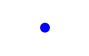

['numpy']

In [ ]:
from sage.misc.citation import get_systems
get_systems("point([0,0], size=50).show(figsize=1, axes=False)")

To visualize large data sets, we can use matrix_plot.

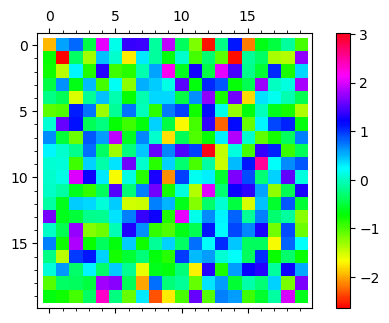

In [ ]:
import numpy as np
A = np.random.normal(0, 1, (20, 20))
matrix_plot(A, cmap='hsv', colorbar=True, figsize=5)

We have already a random coefficient matrix A.
Let us generate a random right hand side vector b and solve a linear system A*x = b.
The random numbers are uniformly distributed in the interval [-1,+1].

In [ ]:
b = np.random.uniform(-1, 1, (20, 1))
x = np.linalg.solve(A,b)
x

array([[ 0.00512064],
       [-0.70480263],
       [ 1.44623146],
       [-0.99364059],
       [-0.74074156],
       [ 2.72227682],
       [-1.16717296],
       [-0.1015867 ],
       [-1.39478794],
       [ 1.54941789],
       [ 2.09291182],
       [ 1.23166181],
       [-0.31414951],
       [-1.92680986],
       [ 0.72882184],
       [ 0.62296124],
       [-0.80584849],
       [ 0.94202707],
       [ 1.06721674],
       [ 0.39764622]])

In [ ]:
v = b - A*x
r = np.linalg.norm(v)
r

27.021346300742454

The residual of a linear system is the norm of b - A*x,
but something went wrong, because the residual is too large!
What is the problem?  Let us look at the type of A, b, and x.

In [ ]:
print('type(A) :', type(A))
print('type(b) :', type(b))
print('type(x) :', type(x))

type(A) : <class 'numpy.ndarray'>
type(b) : <class 'numpy.ndarray'>
type(x) : <class 'numpy.ndarray'>


For the operator arithmetic to work properly,
we must convert to the proper matrix types.

In [ ]:
mA = np.matrix(A)
mb = np.matrix(b)
mx = np.matrix(x)
(type(mA), type(mb), type(mx))

(<class 'numpy.matrix'>, <class 'numpy.matrix'>, <class 'numpy.matrix'>)

Now we can compute the residual correctly.

In [ ]:
v = mb - mA*mx
r = np.linalg.norm(v)
r

6.3440770491716685e-15

**2. Numerical Integration**

Most functions do not have symbolic antiderivatives.

In [ ]:
x = var('x')
f = exp(sin(x))
a = integral(f, x, 0, 1, hold=True)
a.show()

integrate(e^sin(x), x, 0, 1)

We compute a numerical approximation:

In [ ]:
a.n()

1.6318696084180513

Let us see how we got to this ...

In [ ]:
from sage.misc.citation import get_systems
get_systems("a.n()")

/tmp/ipykernel_168/2732729778.py:2: UserWarning: get_systems() requires Cython profiling to be enabled, otherwise the results will be very unreliable. Rebuild Sage with the environment variable 'SAGE_PROFILE=yes' to enable profiling.
  get_systems("a.n()")


['ginac']

GiNAC is a C++ library is it is not a CAS.

Sometimes we may want more diagnostic information.

In [ ]:
from scipy.integrate import quad

In [ ]:
f(x) = exp(sin(x))

In [ ]:
d = quad(func=f,a=0,b=1,full_output=1)
d

(1.6318696084180513,
 1.8117392124517587e-14,
 {'neval': 21,
  'last': 1,
  'iord': array([          1,       21931,           0,           0,   -17793120,
               32687,   -11053888,       32687,  1848425598,   179447140,
           -17772848,       32687,   -11053760,       32687, -1094302173,
          -925536350,   -17772752,       32687,   -11053696,       32687,
          -656120084, -1109646371,   -17772656,       32687,   -11053632,
               32687, -1863383552,   851750764,   -17772560,       32687,
           -11053568,       32687,  -358732886,  1988466565,   -17772464,
               32687,   -11053504,       32687, -1839087321, -1441984478,
           -17760208,       32687,   -11053440,       32687, -1447038753,
           190633445,   -17772368,       32687,         336,           0],
        dtype=int32),
  'alist': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

**3. Rational Approximations**

Often we use a combination of sympy and scipy.
For example, the computation of a Pade approximation
starts from a Taylor series.  We can compute Taylor series
with sympy and Pade approximations with scipy.

In [ ]:
reset()

In [ ]:
from sympy import series, sin

In [ ]:
from sympy.abc import x

In [ ]:
f = sin(x)

In [ ]:
s = series(f,x,0, n=None)
s

<generator object Expr.series.<locals>.<genexpr> at 0x7faffef93990>

In [ ]:
terms = [next(s) for _ in range(6)]
terms

[x, -x**3/6, x**5/120, -x**7/5040, x**9/362880, -x**11/39916800]

In [ ]:
sterms = sum(terms)
sterms

-x**11/39916800 + x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x

In [ ]:
c = [sterms.coeff(x, k) for k in range(6)]
c

[0, 1, 0, -1/6, 0, 1/120]

To compute a Pade approximation, we must convert the list to an array of floats.

In [ ]:
print(c, 'has type', type(c))

[0, 1, 0, -1/6, 0, 1/120] has type <class 'list'>


In [ ]:
import numpy as np
nfc = np.array(c, dtype=float)
print(nfc, 'has type', type(nfc))

[ 0.          1.          0.         -0.16666667  0.          0.00833333] has type <class 'numpy.ndarray'>


Now we import the pade command from scipy.interpolate.

In [ ]:
from scipy.interpolate import pade
p = pade(nfc, 2)
p

(poly1d([-0.11666667,  0.        ,  1.        ,  0.        ]),
 poly1d([0.05, 0.  , 1.  ]))

On return we get numpy polynomials, which have a nice string representation.

In [ ]:
print(type(p[0]))
print('numerator :\n', p[0])
print('denominator :\n', p[1])

<class 'numpy.poly1d'>
numerator :
          3
-0.1167 x + 1 x
denominator :
       2
0.05 x + 1


numpy polynomials are callable, so plotting is no problem
and we compare with the plot of the actual sin(x) function.

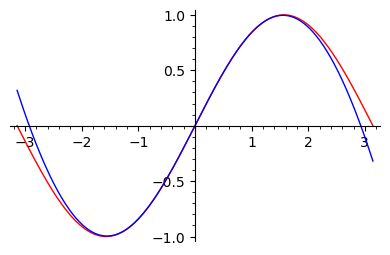

In [ ]:
sp = plot(sin(x), (x, -pi, pi), color='red')
pp = plot(p[0](x)/p[1](x), (x, -pi, pi))
(sp+pp).show(figsize=4)

We can use the function to bring the polynomials from scipy
into SageMath objects.

In [ ]:
fp0 = p[0](x)
print(fp0, 'has type', type(fp0))

x*(1.0 - 0.116666666666667*x**2) has type <class 'sympy.core.mul.Mul'>


In [ ]:
sfp0 = SR(fp0)
print(sfp0, 'has type', type(sfp0))

(-0.116666666666667*x^2 + 1.00000000000000)*x has type <class 'sage.symbolic.expression.Expression'>


**4. Numerical Solving of Ordinary Differential Equations**

We end with the numerical solving of an ordinary differential equation,
taking the pendulum problem: ``diff(theta,t,2) = -diff(theta,1) - 9.8*sin(theta).``
We need to define a system of first-order differential equations,
introducing an extra variable velocity which is the derivative of theta.

In [ ]:
t, theta, velocity = var('t, theta, velocity')
oderhs = [velocity, -velocity-9.8*sin(theta)]
oderhs

[velocity, -velocity - 9.80000000000000*sin(theta)]

The right hand side of the system has to be defined as a function.

In [ ]:
def pend(y, t):
    return [y[1], -y[1]-9.8*sin(y[0])]

We can evaluate the function symbolically, as a verification.

In [ ]:
pend([theta, velocity], t)

[velocity, -velocity - 9.80000000000000*sin(theta)]

Then we import odeint of the scipy.integrate package.

In [ ]:
from scipy.integrate import odeint
from numpy import linspace
npts = 1000 # number of points
tspan = linspace(0, 10, npts)
sol = odeint(pend, [pi/10, 0], tspan)
sol

array([[ 0.31415927,  0.        ],
       [ 0.31400806, -0.03015808],
       [ 0.3135566 , -0.05998775],
       ...,
       [ 0.00157   ,  0.00380359],
       [ 0.00160711,  0.00361063],
       [ 0.00164228,  0.00341607]])

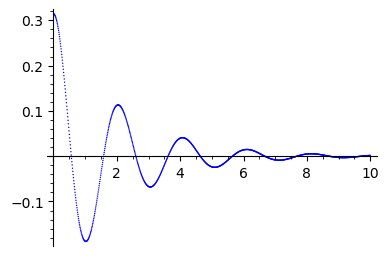

In [ ]:
points = [(tspan[k], sol[k][0]) for k in range(npts)]
list_plot(points,size=1).show(figsize=4)

A phase portrait shows the displacements and the velocities.

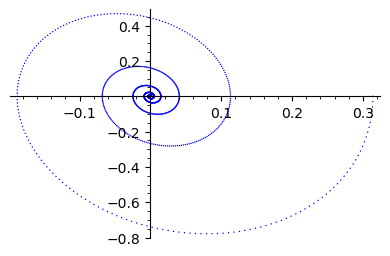

In [ ]:
coords = [(sol[k][0], sol[k][1]) for k in range(npts)]
list_plot(coords, size=1, figsize=4)

### Lec41

This notebook uses Julia to do symbolic computation: *it must run with a Julia kernel!*

Consider the problem of computing the slope of the tangent line to a point on a circle.

**1. Implicit Differentiation with SymPy.jl**

In [ ]:
using SymPy

In [ ]:
x = Sym("x")

x

In [ ]:
y = SymFunction("y")

y

In [ ]:
dy = diff(y(x), x)

d       
──(y(x))
dx      

In [ ]:
typeof(dy)

Sym{PyCall.PyObject}

In [ ]:
c = x^2 + y(x)^2 - 1

 2    2       
x  + y (x) - 1

In [ ]:
typeof(c)

Sym{PyCall.PyObject}

In [ ]:
dc = diff(c, x)

             d       
2⋅x + 2⋅y(x)⋅──(y(x))
             dx      

In [ ]:
dydx = solve(dc, dy)

1-element Vector{Sym{PyCall.PyObject}}:
 -x/y(x)

In [ ]:
typeof(dydx)

Vector{Sym{PyObject}} (alias for Array{Sym{PyCall.PyObject}, 1})

From the output above, we see that ``dydx`` is an array.  Arrays in Julia start at one.

In [ ]:
symbolicslope = dydx[1]

-x  
────
y(x)

Let us now take a random point on the circle, which is generated by a random angle.

In [ ]:
angle = 2*pi*rand()

3.0739308808121364

Because Julia is oriented towards numerical computing, the ``pi`` is a 64-bit floating point constant.

In [ ]:
(a, b) = (cos(angle), sin(angle))

(-0.9977118154165967, 0.06761015735907423)

We store the coordinates of the point in a dictionary, which is a convenient data structure for substitution.

In [ ]:
sd = Dict(x => a, y(x) => b)

Dict{Sym{PyCall.PyObject}, Float64} with 2 entries:
  y(x) => 0.0676102
  x    => -0.997712

In [ ]:
slope = symbolicslope.subs(sd)

14.7568332095102

We see that the ``subs`` executed a simultaneous substitution.

Let us now do the slope computation via a Taylor series.  The ``series`` of ``SymPy`` works only for one variable, but it works well on purely symbolic expressions.  We declare new symbols ``X`` and ``Y`` for the variables in the circle equation and ``A`` and ``B`` for the coordinates of the point.

In [ ]:
X, Y, A, B = Sym("X, Y, A, B")

(X, Y, A, B)

In [ ]:
nc = X^2 + Y^2  - 1

 2    2    
X  + Y  - 1

In [ ]:
cx = SymPy.series(nc, X, A, 2)

      2                   2    ⎛        2       ⎞
-1 + Y  + 2⋅A⋅(-A + X) + A  + O⎝(-A + X) ; X → A⎠

To convert the ``cx`` into a symbolic expression on which we can apply the ``series`` again, we select the coefficients and make the expression ``px``.

In [ ]:
cx.coeff(X-A,1)

2⋅A

In [ ]:
cx.coeff(X, 0)

 2    2    
A  + Y  - 1

In [ ]:
px = cx.coeff(X, 0) + cx.coeff(X-A, 1)*(X-A)

 2                   2    
A  + 2⋅A⋅(-A + X) + Y  - 1

In [ ]:
cy = series(px, Y, B, 2)

                     2                   2    ⎛        2       ⎞
-1 + 2⋅B⋅(-B + Y) + B  + 2⋅A⋅(-A + X) + A  + O⎝(-B + Y) ; Y → B⎠

In [ ]:
py = cy.coeff(Y, 0) + cy.coeff(Y-B, 1)*(Y-B)

 2                   2                   
A  + 2⋅A⋅(-A + X) + B  + 2⋅B⋅(-B + Y) - 1

In [ ]:
cY = py.subs(Dict(A=>a, B=>b))

-1.99542363083319⋅X + 0.135220314718148⋅Y - 2.0

In [ ]:
- cY.coeff(X, 1)/cY.coeff(Y, 1)

14.7568332095102

In [ ]:
slope

14.7568332095102

**2. Implicit Differentiation via Symbolics.jl**

In [ ]:
using Symbolics

In [ ]:
@variables x, y(x)

2-element Vector{Num}:
    x
 y(x)

Also ``SymPy`` has a ``Differential`` and in order not to confuse, because we have done ``using SymPy`` earlier in this notebook, we have have to declare that we are using the ``Differential`` from ``Symbolics``.

In [ ]:
D = Symbolics.Differential(x)

Differential(x)

In [ ]:
dy = D(y)

Differential(x)(y(x))

In [ ]:
typeof(dy)

Num

In [ ]:
c = x^2 + y^2 - 1

-1 + x^2 + y(x)^2

In [ ]:
dc = D(c)

Differential(x)(-1 + x^2 + y(x)^2)

In [ ]:
eq = expand_derivatives(dc)

2x + 2Differential(x)(y(x))*y(x)

In [ ]:
SBslope = Symbolics.solve_for(eq, dy)

(-x) / y(x)

We have to make a new dictionary with the coordinates for the points, mapping them to the Symbolics variables.

In [ ]:
nsd = Dict(x => a, y => b)

Dict{Num, Float64} with 2 entries:
  y(x) => 0.0676102
  x    => -0.997712

In [ ]:
substitute(SBslope, nsd)

14.756833209510194

Let us compare with the slope we computed earlier.

In [ ]:
slope

14.7568332095102

### Lec42

We explore parallel computing with Julia.

**1. Multithreading**

In [ ]:
using Base.Threads

In [ ]:
nthreads()

16

The above output verifies that we have 16 threads at our disposal.  How did we get here?

This notebook runs with a new kernel, where the environment variable ``JULIA_NUM_THREADS`` is set to 16.

1. ``julia> using IJulia``

2. ``julia> installkernel("Julia (16 threads)", env=Dict("JULIA_NUM_THREADS"=>"16"))``

Before launching jupyter lab, it is also good to do `export JULIA_NUM_THREAD=16`.

**2. Parallel Matrix Matrix Multiplication**

In [ ]:
using LinearAlgebra

In [ ]:
n = 8000

8000

In [ ]:
A = rand(n, n);
B = rand(n, n);
C = rand(n, n);

In [ ]:
BLAS.set_num_threads(2)

In [ ]:
@time mul!(C, A, B)

 18.561983 seconds (2.15 M allocations: 145.880 MiB, 2.29% compilation time)


8000×8000 Matrix{Float64}:
 2002.61  2002.15  2035.81  2026.74  …  2010.5   2042.48  2015.96  2016.68
 1980.5   1987.49  2012.79  1991.08     1978.89  2018.74  1996.94  2003.18
 1957.56  1984.21  1995.79  1987.67     1977.49  2000.38  1968.04  1978.16
 2003.2   1999.25  2027.97  2013.44     2024.4   2034.51  2020.6   2020.59
 1988.05  1972.63  1996.61  1997.61     1996.68  2009.31  1984.49  2007.51
 1991.66  2005.56  2034.45  2016.99  …  2028.13  2041.0   2015.59  2012.05
 1993.78  1996.21  1998.82  1996.22     1998.42  2014.44  2013.73  2000.38
 1986.32  1998.09  2022.94  2008.16     2009.88  2057.23  2013.93  2028.85
 1980.79  2000.92  2024.78  2006.74     2003.33  2039.24  2001.3   2006.21
 1988.08  1995.01  2014.57  2004.84     2002.83  2009.4   1987.22  1992.63
 1992.78  2007.42  2021.4   2006.39  …  1995.28  2029.4   2021.63  2028.23
 2005.45  2017.17  2048.03  2004.62     2008.33  2036.29  2002.41  2014.06
 1965.99  1963.5   1980.35  1972.23     1977.56  1997.92  1973.4   1973.8

Observe that the timer reports the compilation time as well.  Let us redo the computation.

In [ ]:
@time mul!(C, A, B)

 18.019970 seconds


8000×8000 Matrix{Float64}:
 2002.61  2002.15  2035.81  2026.74  …  2010.5   2042.48  2015.96  2016.68
 1980.5   1987.49  2012.79  1991.08     1978.89  2018.74  1996.94  2003.18
 1957.56  1984.21  1995.79  1987.67     1977.49  2000.38  1968.04  1978.16
 2003.2   1999.25  2027.97  2013.44     2024.4   2034.51  2020.6   2020.59
 1988.05  1972.63  1996.61  1997.61     1996.68  2009.31  1984.49  2007.51
 1991.66  2005.56  2034.45  2016.99  …  2028.13  2041.0   2015.59  2012.05
 1993.78  1996.21  1998.82  1996.22     1998.42  2014.44  2013.73  2000.38
 1986.32  1998.09  2022.94  2008.16     2009.88  2057.23  2013.93  2028.85
 1980.79  2000.92  2024.78  2006.74     2003.33  2039.24  2001.3   2006.21
 1988.08  1995.01  2014.57  2004.84     2002.83  2009.4   1987.22  1992.63
 1992.78  2007.42  2021.4   2006.39  …  1995.28  2029.4   2021.63  2028.23
 2005.45  2017.17  2048.03  2004.62     2008.33  2036.29  2002.41  2014.06
 1965.99  1963.5   1980.35  1972.23     1977.56  1997.92  1973.4   1973.8

And now we double the number of threads...

In [ ]:
BLAS.set_num_threads(4)

In [ ]:
@time mul!(C, A, B)

  9.752459 seconds


8000×8000 Matrix{Float64}:
 2002.61  2002.15  2035.81  2026.74  …  2010.5   2042.48  2015.96  2016.68
 1980.5   1987.49  2012.79  1991.08     1978.89  2018.74  1996.94  2003.18
 1957.56  1984.21  1995.79  1987.67     1977.49  2000.38  1968.04  1978.16
 2003.2   1999.25  2027.97  2013.44     2024.4   2034.51  2020.6   2020.59
 1988.05  1972.63  1996.61  1997.61     1996.68  2009.31  1984.49  2007.51
 1991.66  2005.56  2034.45  2016.99  …  2028.13  2041.0   2015.59  2012.05
 1993.78  1996.21  1998.82  1996.22     1998.42  2014.44  2013.73  2000.38
 1986.32  1998.09  2022.94  2008.16     2009.88  2057.23  2013.93  2028.85
 1980.79  2000.92  2024.78  2006.74     2003.33  2039.24  2001.3   2006.21
 1988.08  1995.01  2014.57  2004.84     2002.83  2009.4   1987.22  1992.63
 1992.78  2007.42  2021.4   2006.39  …  1995.28  2029.4   2021.63  2028.23
 2005.45  2017.17  2048.03  2004.62     2008.33  2036.29  2002.41  2014.06
 1965.99  1963.5   1980.35  1972.23     1977.56  1997.92  1973.4   1973.8

We went from 18 seconds with two threads to 10 seconds on four threads.

**2. Peak Performance**

``peakflops`` computes the peak flop rate for the computer using double precision ``gemm!``.

In [ ]:
peakflops(8000)

1.0489094017708801e11

In [ ]:
peakflops(4000)

In [ ]:
peakflops(16000)

Dimension 4000 is better than 8000 and 16000 on this computer.

In [ ]:
2*10^11

To put the output is perspective, ``2 10^11`` is the number 200,000,000,000 or 200 billion.

**3. Parallel Numerical Integration**

Consider the estimation of $\pi$ via a Monte Carlo method.

In [ ]:
myrand(x::Int64) = (1103515245x + 12345) % 2^31

In [ ]:
"""
    function estimatepi(n)

Runs a simple Monte Carlo method
to estimate pi with n samples.
"""
function estimatepi(n)
   r = threadid()
   count = 0
   for i=1:n
       r = myrand(r)
       x = r/2^31
       r = myrand(r)
       y = r/2^31
       count += (x^2 + y^2) <= 1
   end
   return 4*count/n
end

In [ ]:
nt = nthreads()
println("The number of threads : $nt")
estimates = zeros(nt)

In [ ]:
import Statistics

In [ ]:
timestart = time()
@threads for i=1:nt
    estimates[i] = estimatepi(10_000_000_000/nt) 
end
estpi = Statistics.mean(estimates)
elapsed16 = time() - timestart

In [ ]:
println("The estimate for Pi : $estpi")
println("The elapsed time for 16 threads : $elapsed16 seconds")

Let us redo this for 8 threads.

In [ ]:
nt8 = 8

In [ ]:
timestart = time()
@threads for i=1:nt8
    estimates[i] = estimatepi(10_000_000_000/nt8) 
end
estpi = Statistics.mean(estimates[1:nt8])
elapsed8 = time() - timestart

In [ ]:
println("The estimate for Pi : $estpi")
println("The elapsed time for 8 threads : $elapsed8 seconds")

In [ ]:
speedup = elapsed8/elapsed16

Instead of speedup, we can look for quality up.  Every thread does the same number of samples, but with more threads running, we expect a better accuracy.

In [ ]:
timestart = time()
@threads for i=1:2
    estimates[i] = estimatepi(10_000_000_000) 
end
estpi = Statistics.mean(estimates[1:2])
elapsed8 = time() - timestart

In [ ]:
err2 = estpi - pi
println("The estimate for Pi : $estpi")
println("The error : $err8")
println("The elapsed time for 2 threads : $elapsed8 seconds")

In [ ]:
nt

In [ ]:
timestart = time()
@threads for i=1:
    estimates[i] = estimatepi(10_000_000_000) 
end
estpi = Statistics.mean(estimates[1:nt])
elapsed8 = time() - timestart

In [ ]:
err16 = estpi - pi
println("The estimate for Pi : $estpi")
println("The error : $err16")
println("The elapsed time for 8 threads : $elapsed8 seconds")